In [505]:
import uproot 
import numpy as np
import matplotlib.pyplot as plt
import statistics as stat
import matplotlib.cm as cm
from matplotlib.patches import Patch
from iminuit import Minuit
from iminuit.cost import LeastSquares
from scipy.optimize import curve_fit
from scipy.special import erfc
from scipy.stats import norm
import importlib
import pandas as pd
import basicfunc as bbb

importlib.reload(bbb)

<module 'basicfunc' from 'c:\\Users\\anton\\OneDrive\\Desktop\\Imaging\\imaging\\basicfunc.py'>

In [506]:
k = 2

# calibrazione

In [507]:
D1 = uproot.open('data_imaging\\group23_22Na_D1_10min_definitivo\\RAW\\DataR_CH0@DT5720B_781_group23_22Na_D1_10min_definitivo.root')
D2 = uproot.open('data_imaging\\group23_22Na_D2_10min_definitivo_sicuri\\RAW\\DataR_CH1@DT5720B_781_group23_22Na_D2_10min_definitivo_sicuri.root')
D3 = uproot.open('data_imaging\\group23_22Na_D3_10min_def\\RAW\\DataR_CH2@DT5720B_781_group23_22Na_D3_10min_def.root')
D4 = uproot.open('data_imaging\\group23_22Na_D4_10min_def\\RAW\\DataR_CH3@DT5720B_781_group23_22Na_D4_10min_def.root')
D5 = uproot.open('data_imaging\\group23_22Na_D5_10min_def\\RAW\\DataR_CH0@DT5720B_467_group23_22Na_D5_10min_def.root')
D6 = uproot.open('data_imaging\\group23_22Na_D6_10min_def\\RAW\\DataR_CH1@DT5720B_467_group23_22Na_D6_10min_def.root')
D7 = uproot.open('data_imaging\\group23_22Na_D6_10min_def\\RAW\\DataR_CH2@DT5720B_467_group23_22Na_D6_10min_def.root')
D8 = uproot.open('data_imaging\\group23_22Na_D6_10min_def\\RAW\\DataR_CH3@DT5720B_467_group23_22Na_D6_10min_def.root')

In [508]:
d1 = np.asarray(D1['Data_R;1']['Energy'].array())
d2 = np.asarray(D2['Data_R;2']['Energy'].array())
d3 = np.asarray(D3['Data_R;2']['Energy'].array())
d4 = np.asarray(D4['Data_R;2']['Energy'].array())
d5 = np.asarray(D5['Data_R;3']['Energy'].array())
d6 = np.asarray(D6['Data_R;3']['Energy'].array())
d7 = np.asarray(D7['Data_R;2']['Energy'].array())
d8 = np.asarray(D8['Data_R;2']['Energy'].array())


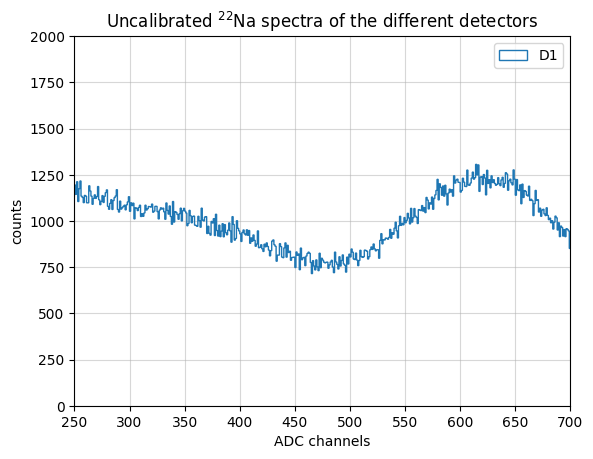

In [605]:
plt.hist(d1, bins=int(d1.max()), histtype='step', label='D1')
# plt.hist(d2, bins=int(d2.max()), histtype='step', label='D2')
# plt.hist(d3, bins=int(d3.max()), histtype='step', label='D3')
# plt.hist(d4, bins=int(d4.max()), histtype='step', label='D4')
# plt.hist(d5, bins=int(d5.max()), histtype='step', label='D5')
# plt.hist(d6, bins=int(d6.max()), histtype='step', label='D6')
# plt.hist(d7, bins=int(d7.max()), histtype='step', label='D7')
# plt.hist(d8, bins=int(d8.max()), histtype='step', label='D8')
plt.axvline(x=22.5, color='red')
# plt.axvline(x=50, color='red')
plt.title(r'Uncalibrated $^{22}$Na spectra of the different detectors')
plt.xlabel('ADC channels')
plt.ylabel('counts')
plt.ylim(0, 2000)
plt.xlim(250, 700)
plt.grid(alpha=0.5)
plt.legend()
plt.show()

In [510]:
print('D1 \nCompton')
# d1normCom = bbb.normal(d1, xlabel='ADC channels', ylabel='counts', titolo=r'Fit of the of $^{22}$Na', xmin=500, xmax=750, x1=0, x2=3000, b=int(d1.max()), n=2)
print('Primo picco:')
d1norm1 = bbb.normal(d1, xmin=500, xmax=750, x1=0, x2=3000, b=int(d1.max()), n=k)
print('Secondo picco:')
d1norm2 = bbb.normal(d1, xmin=1400, xmax=2000, x1=0, x2=3000, b=int(d1.max()), n=k)
print('______________________________________________________________________________________________________________')
print('D2 \nPrimo picco')
d2norm1 = bbb.normal(d2, xmin=600, xmax=950, x1=0, x2=3000, b=int(d2.max()), n=k)
print('Secondo picco')
d2norm2 = bbb.normal(d2,  xmin=1750, xmax=2300, x1=0, x2=3000, b=int(d2.max()), n=k)
print('______________________________________________________________________________________________________________')
print('D3 \nPrimo Picco')
d3norm1 = bbb.normal(d3, xmin=170, xmax=300, x1=0, x2=3000, b=int(d3.max()), n=k)
print('Secondo picco')
d3norm2 = bbb.normal(d3, xmin=520, xmax=700, x1=0, x2=3000, b=int(d3.max()), n=k)
print('______________________________________________________________________________________________________________')
print('D4 \nPrimo picco')
d4norm1 = bbb.normal(d4, xmin=320, xmax=570, x1=0, x2=3000, b=int(d4.max()), n=k)
print('Secondo picco')
d4norm2 = bbb.normal(d4, xmin=1000, xmax=1350, x1=0, x2=3000, b=int(d4.max()), n=k)
print('______________________________________________________________________________________________________________')
print('D5 \nPrimo picco')
d5norm1 = bbb.normal(d5, xmin=150, xmax=300, x1=0, x2=3000, b=int(d5.max()), n=k)
print('Secondo picco')
d5norm2 = bbb.normal(d5, xmin=480, xmax=680, x1=0, x2=3000, b=int(d5.max()), n=k)
print('______________________________________________________________________________________________________________')
print('D6 \nPrimo picco')
d6norm1 = bbb.normal(d6, xmin=350, xmax=580, x1=0, x2=3000, b=int(d6.max()), n=k)
print('Secondo picco')
d6norm2 = bbb.normal(d6, xmin=1100, xmax=1450, x1=0, x2=3000, b=int(d6.max()), n=k)
print('______________________________________________________________________________________________________________')
print('D7 \nPrimo picco')
d7norm1 = bbb.normal(d7, xmin=140, xmax=200, x1=200, x2=300, b=int(d7.max()), n=k)
print('Secondo picco')
d7norm2 = bbb.normal(d7, xmin=400, xmax=550, x1=350, x2=700, b=int(d7.max()), n=k)
print('______________________________________________________________________________________________________________')
print('D8 \nPrimo picco')
d8norm1 = bbb.normal(d8, xmin=110, xmax=200, x1=50, x2=250, b=int(d8.max()), n=k)
print('Secondo picco')
d8norm2 = bbb.normal(d8, xmin=300, xmax=450, x1=200, x2=500, b=int(d8.max()), n=k)

D1 
Compton
Primo picco:
Parametri ottimizzati:
-----------------------------------------------
Ampiezza = 338109.3599060629 ± 1905.151088414951
Media = 616.0207899885756 ± 0.4835257283466749
Sigma = 110.79018891855962 ± 0.8060963475372384
Chi-quadro = 357.134863942679
Chi-quadro ridotto = 1.445890137419753
Integrale dell'istogramma nel range [394.44041215145637, 837.6011678256949] = 371889 ± 609
Secondo picco:
Parametri ottimizzati:
-----------------------------------------------
Ampiezza = 43765.79421203449 ± 299.57369506237745
Media = 1624.6067070564497 ± 1.2564103943678144
Sigma = 168.99294309209205 ± 1.4516617266924874
Chi-quadro = 662.171225457022
Chi-quadro ridotto = 1.1091645317538057
Integrale dell'istogramma nel range [1286.6208208722655, 1962.592593240634] = 44017 ± 209
______________________________________________________________________________________________________________
D2 
Primo picco
Parametri ottimizzati:
-----------------------------------------------
Ampiezza =

In [511]:
y_calib = np.array([511, 1275]) #KeV
#__________________________________________________________________________________________________________
xD1 = np.array([d1norm1[0][1], d1norm2[0][1]])
sxD1 = np.array([d1norm1[1][1], d1norm2[1][1],])
calibrazioneD1 = bbb.linear_regression(xD1, y_calib, sx=sxD1, sy = None)
print('__________________________________________________________________________________________________________')
xD2 = np.array([d2norm1[0][1], d2norm2[0][1]])
sxD2 = np.array([d2norm1[1][1], d2norm2[1][1],])
calibrazioneD2 = bbb.linear_regression(xD2, y_calib, sx=sxD2, sy = None)
print('__________________________________________________________________________________________________________')
xD3 = np.array([d3norm1[0][1], d3norm2[0][1]])
sxD3 = np.array([d3norm1[1][1], d3norm2[1][1],])
calibrazioneD3 = bbb.linear_regression(xD3, y_calib, sx=sxD3, sy = None)
print('__________________________________________________________________________________________________________')
xD4 = np.array([d4norm1[0][1], d4norm2[0][1]])
sxD4 = np.array([d4norm1[1][1], d4norm2[1][1],])
calibrazioneD4 = bbb.linear_regression(xD4, y_calib, sx=sxD4, sy = None)
print('__________________________________________________________________________________________________________')
xD5 = np.array([d5norm1[0][1], d5norm2[0][1]])
sxD5 = np.array([d5norm1[1][1], d5norm2[1][1],])
calibrazioneD5 = bbb.linear_regression(xD5, y_calib, sx=sxD5, sy = None)
print('__________________________________________________________________________________________________________')
xD6 = np.array([d6norm1[0][1], d6norm2[0][1]])
sxD6 = np.array([d6norm1[1][1], d6norm2[1][1],])
calibrazioneD6 = bbb.linear_regression(xD6, y_calib, sx=sxD6, sy = None)
print('__________________________________________________________________________________________________________')
xD7 = np.array([d7norm1[0][1], d7norm2[0][1]])
sxD7 = np.array([d7norm1[1][1], d7norm2[1][1],])
calibrazioneD7 = bbb.linear_regression(xD7, y_calib, sx=sxD7, sy = None)
print('__________________________________________________________________________________________________________')
xD8 = np.array([d8norm1[0][1], d8norm2[0][1]])
sxD8 = np.array([d8norm1[1][1], d8norm2[1][1],])
calibrazioneD8 = bbb.linear_regression(xD8, y_calib, sx=sxD8, sy = None)


Parametri ottimizzati:
-----------------------------------------------
Inclinazione (m) = 0.7574962004433666 ± 0.0015822020251721697
Intercetta (q) = 44.36659218904066 ± 1.0350907569265246
Chi-squared= 1.5369234634999633e-18
Non ha senso calcolare il chi2 ridotto
__________________________________________________________________________________________________________
Parametri ottimizzati:
-----------------------------------------------
Inclinazione (m) = 0.631641346893913 ± 0.0003609030711236539
Intercetta (q) = 22.201632035585305 ± 0.28713120187355545
Chi-squared= 5.705489716034212e-17
Non ha senso calcolare il chi2 ridotto
__________________________________________________________________________________________________________
Parametri ottimizzati:
-----------------------------------------------
Inclinazione (m) = 2.121317450816527 ± 0.00027138444246053875
Intercetta (q) = 11.822421778864964 ± 0.06852605098058366
Chi-squared= 3.642388148156892e-17
Non ha senso calcolare il chi2 r

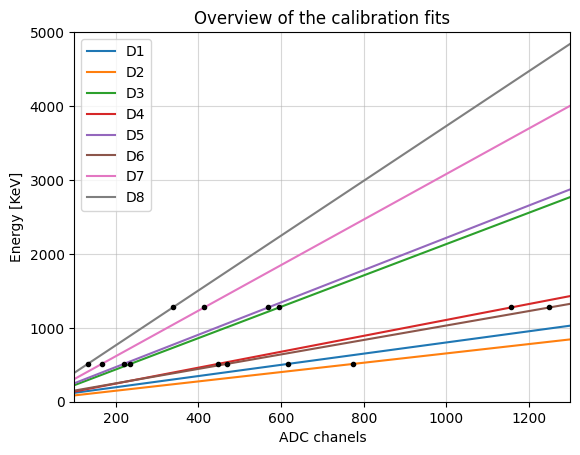

In [512]:
# Lista degli array
arr_x = [xD1, xD2, xD3, xD4, xD5, xD6, xD7, xD8]
arr_sx = [sxD1, sxD2, sxD3, sxD4, sxD5, sxD6, sxD7, sxD8]
arr_y = [y_calib, y_calib, y_calib, y_calib, y_calib, y_calib, y_calib, y_calib]
# Creazione del nuovo array
x = np.array([elem for arr in arr_x for elem in arr])
sx = np.array([elem for arr in arr_sx for elem in arr])
y = np.array([elem for arr in arr_y for elem in arr])
x_fit = np.linspace(0, 2100, 1000)
# plt.figure(figsize=(7, 5))
plt.errorbar(x, y, xerr=sx, fmt='o', color='black', markersize=3, capsize=1.5)
plt.plot(x_fit, bbb.linear(x_fit, calibrazioneD1[0], calibrazioneD1[1]), label='D1')
plt.plot(x_fit, bbb.linear(x_fit, calibrazioneD2[0], calibrazioneD2[1]), label='D2')
plt.plot(x_fit, bbb.linear(x_fit, calibrazioneD3[0], calibrazioneD3[1]), label='D3')
plt.plot(x_fit, bbb.linear(x_fit, calibrazioneD4[0], calibrazioneD4[1]), label='D4')
plt.plot(x_fit, bbb.linear(x_fit, calibrazioneD5[0], calibrazioneD5[1]), label='D5')
plt.plot(x_fit, bbb.linear(x_fit, calibrazioneD6[0], calibrazioneD6[1]), label='D6')
plt.plot(x_fit, bbb.linear(x_fit, calibrazioneD7[0], calibrazioneD7[1]), label='D7')
plt.plot(x_fit, bbb.linear(x_fit, calibrazioneD8[0], calibrazioneD8[1]), label='D8')
plt.title('Overview of the calibration fits')
plt.xlabel('ADC chanels')
plt.ylabel('Energy [KeV]')
plt.ylim(0, 5000)
plt.xlim(100, 1300)
plt.legend()
plt.grid(alpha=0.5)
plt.savefig('grafici/calib_fit_tutti.pdf', format='pdf', dpi=500, bbox_inches='tight')
plt.show()

Primo picco:
Parametri ottimizzati:
-----------------------------------------------
Ampiezza = 262101.73808004783 ± 2636.52176412058
Media = 510.18298408947294 ± 0.9198937944781685
Sigma = 85.74907504026275 ± 0.823667587646722
Chi-quadro = 354.5485572688075
Chi-quadro ridotto = 1.5087172649736489
Integrale dell'istogramma nel range [338.6848340089474, 681.6811341699985] = 377341 ± 614


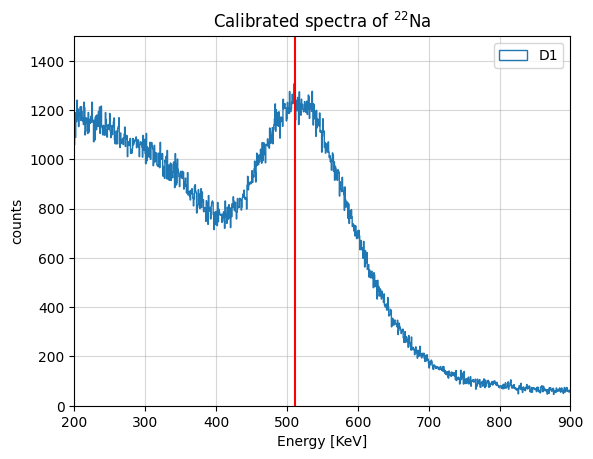

In [513]:
d1_calib = d1*calibrazioneD1[0]+calibrazioneD1[1]
print('Primo picco:')
d1_calibb_norm1 = bbb.normal(d1_calib, xmin=480, xmax=660, x1=0, x2=3000, b=int(d1.max()), n=k)

plt.hist(d1_calib, bins=int(d1.max()), histtype='step', label='D1')
plt.axvline(x=511, color='red')
plt.axvline(x=1275, color='red')
plt.title(r'Calibrated spectra of $^{22}$Na')
plt.xlabel('Energy [KeV]')
plt.ylabel('counts')
plt.ylim(0, 1500)
plt.xlim(200, 900)
plt.grid(alpha=0.5)
plt.legend()
plt.show()

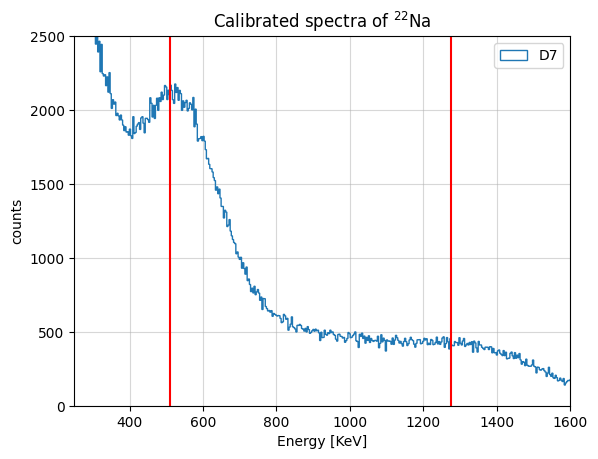

In [514]:
d7_calib = d7*calibrazioneD7[0]+calibrazioneD7[1]
plt.hist(d7_calib, bins=int(d1.max()), histtype='step', label='D7')
plt.axvline(x=511, color='red')
plt.axvline(x=1275, color='red')
plt.title(r'Calibrated spectra of $^{22}$Na')
plt.xlabel('Energy [KeV]')
plt.ylabel('counts')
plt.ylim(0, 2500)
plt.xlim(250, 1600)
plt.grid(alpha=0.5)
plt.legend()
plt.show()

# samples

In [515]:
l = 250 #mm
h = 15 #mm
g = 5 #mm
s = np.array([5*g+9*h/2, 4*g+7*h/2, 3*g+5*h/2, 2*g+3*h/2, g+h/2, -h/2, -g-3*h/2])
theta_max = []
theta_min = []
for i in range(7):
    theta_max.append(np.arctan((s[i]+h)/l))
    theta_min.append(np.arctan(s[i]/l))
theta_max = np.array(theta_max)
theta_min = np.array(theta_min)
x0_lead = 5 #mm
x0_pol = 20 #mm
x0_alu = 20 #mm
x0_iron = 10 #mm
x0_graph = 20 #mm 
x_eff_lead = x0_lead/(2*(theta_max-theta_min))*(np.log((1+np.sin(theta_max))/(1-np.sin(theta_max)))-np.log((1+np.sin(theta_min))/(1-np.sin(theta_min))))
x_eff_pol = x0_pol/(2*(theta_max-theta_min))*(np.log((1+np.sin(theta_max))/(1-np.sin(theta_max)))-np.log((1+np.sin(theta_min))/(1-np.sin(theta_min))))
x_eff_alu = x0_alu/(2*(theta_max-theta_min))*(np.log((1+np.sin(theta_max))/(1-np.sin(theta_max)))-np.log((1+np.sin(theta_min))/(1-np.sin(theta_min))))
x_eff_iron = x0_iron/(2*(theta_max-theta_min))*(np.log((1+np.sin(theta_max))/(1-np.sin(theta_max)))-np.log((1+np.sin(theta_min))/(1-np.sin(theta_min))))
x_eff_graph= x0_graph/(2*(theta_max-theta_min))*(np.log((1+np.sin(theta_max))/(1-np.sin(theta_max)))-np.log((1+np.sin(theta_min))/(1-np.sin(theta_min))))


## HOME

In [516]:
home_d1 = uproot.open('data_imaging\\group23_home_30min\\RAW\\DataR_CH0@DT5720B_781_group23_home_30min.root')
home_d2 = uproot.open('data_imaging\\group23_home_30min\\RAW\\DataR_CH1@DT5720B_781_group23_home_30min.root')
home_d3 = uproot.open('data_imaging\\group23_home_30min\\RAW\\DataR_CH2@DT5720B_781_group23_home_30min.root')
home_d4 = uproot.open('data_imaging\\group23_home_30min\\RAW\\DataR_CH3@DT5720B_781_group23_home_30min.root')
home_d5 = uproot.open('data_imaging\\group23_home_30min\\RAW\\DataR_CH0@DT5720B_467_group23_home_30min.root')
home_d6 = uproot.open('data_imaging\\group23_home_30min\\RAW\\DataR_CH1@DT5720B_467_group23_home_30min.root')
home_d7 = uproot.open('data_imaging\\group23_home_30min\\RAW\\DataR_CH2@DT5720B_467_group23_home_30min.root')
home_d8 = uproot.open('data_imaging\\group23_home_30min\\RAW\\DataR_CH3@DT5720B_467_group23_home_30min.root')

In [517]:
hm_d1 = np.asarray(home_d1['Data_R;1']['Energy'].array())
hm_d1_calib = hm_d1 * calibrazioneD1[0] + calibrazioneD1[1]
hm_d1_def = hm_d1_calib[hm_d1_calib != 0]

hm_d2 = np.asarray(home_d2['Data_R;1']['Energy'].array())
hm_d2_calib = hm_d2 * calibrazioneD2[0] + calibrazioneD2[1]
hm_d2_def = hm_d2_calib[hm_d2_calib != 0]

hm_d3 = np.asarray(home_d3['Data_R;1']['Energy'].array())
hm_d3_calib = hm_d3 * calibrazioneD3[0] + calibrazioneD3[1]
hm_d3_def = hm_d3_calib[hm_d3_calib != 0]

hm_d4 = np.asarray(home_d4['Data_R;1']['Energy'].array())
hm_d4_calib = hm_d4 * calibrazioneD4[0] + calibrazioneD4[1]
hm_d4_def = hm_d4_calib[hm_d4_calib != 0]

hm_d5 = np.asarray(home_d5['Data_R;1']['Energy'].array())
hm_d5_calib = hm_d5 * calibrazioneD5[0] + calibrazioneD5[1]
hm_d5_def = hm_d5_calib[hm_d5_calib != 0]

hm_d6 = np.asarray(home_d6['Data_R;1']['Energy'].array())
hm_d6_calib = hm_d6 * calibrazioneD6[0] + calibrazioneD6[1]
hm_d6_def = hm_d6_calib[hm_d6_calib != 0]

hm_d7 = np.asarray(home_d7['Data_R;1']['Energy'].array())
hm_d7_calib = hm_d7 * calibrazioneD7[0] + calibrazioneD7[1]
hm_d7_def = hm_d7_calib[hm_d7_calib != 0]

hm_d8 = np.asarray(home_d8['Data_R;1']['Energy'].array())
hm_d8_calib = hm_d8 * calibrazioneD8[0] + calibrazioneD8[1]
hm_d8_def = hm_d8_calib[hm_d8_calib != 0]


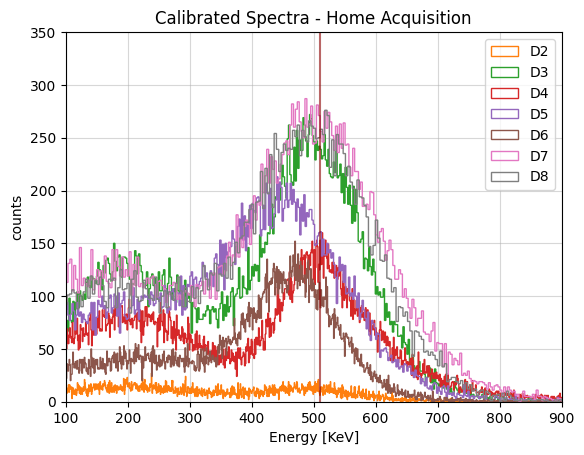

In [604]:
default_colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
#plt.hist(hm_d1_def, bins=int(hm_d1.max()), histtype='step', label='D1', color=default_colors[0])
plt.hist(hm_d2_def, bins=int(hm_d2.max()), histtype='step', label='D2', color=default_colors[1])
plt.hist(hm_d3_def, bins=int(hm_d3.max()), histtype='step', label='D3', color=default_colors[2])
plt.hist(hm_d4_def, bins=int(hm_d4.max()), histtype='step', label='D4', color=default_colors[3])
plt.hist(hm_d5_def, bins=int(hm_d5.max()), histtype='step', label='D5', color=default_colors[4])
plt.hist(hm_d6_def, bins=int(hm_d6.max()), histtype='step', label='D6', color=default_colors[5])
plt.hist(hm_d7_def, bins=int(hm_d7.max()), histtype='step', label='D7', color=default_colors[6])
plt.hist(hm_d8_def, bins=int(hm_d8.max()), histtype='step', label='D8', color=default_colors[7])
plt.axvline(x=511, color='darkred', alpha=0.6)
plt.title(r'Calibrated Spectra - Home Acquisition')
plt.xlabel('Energy [KeV]')
plt.ylabel('counts')
plt.ylim(0, 350)
plt.xlim(100, 900)
plt.grid(alpha=0.5)
plt.legend()
plt.savefig('grafici/calib_home.pdf', format='pdf', dpi=700, bbox_inches='tight')
plt.show()

In [519]:
fit_hm_d1 = bbb.normal(hm_d1_def, xmin=400, xmax=670, x1=0, x2=1000, b=int(hm_d1_def.max()/10), n=k)
fit_hm_d2 = bbb.normal(hm_d2_def, xmin=400, xmax=600, x1=0, x2=1000, b=int(hm_d2_def.max()/10), n=k)
fit_hm_d3 = bbb.normal(hm_d3_def, xmin=370, xmax=650, x1=0, x2=1000, b=int(hm_d3_def.max()/10), n=k)
fit_hm_d4 = bbb.normal(hm_d4_def, xmin=400, xmax=650, x1=0, x2=1000, b=int(hm_d4_def.max()/10), n=k)
fit_hm_d5 = bbb.normal(hm_d5_def, xmin=300, xmax=600, x1=0, x2=1000, b=int(hm_d5_def.max()/10), n=k)
fit_hm_d6 = bbb.normal(hm_d6_def, xmin=350, xmax=600, x1=0, x2=1000, b=int(hm_d6_def.max()/10), n=k)
fit_hm_d7 = bbb.normal(hm_d7_def, xmin=400, xmax=660, x1=0, x2=1000, b=int(hm_d7_def.max()/10), n=k)
fit_hm_d8 = bbb.normal(hm_d8_def, xmin=400, xmax=660, x1=0, x2=1000, b=int(hm_d8_def.max()/10), n=k)

#integrals dal det2 al det8
hm_int = np.array([fit_hm_d2[5][0], fit_hm_d3[5][0], fit_hm_d4[5][0], fit_hm_d5[5][0], fit_hm_d6[5][0], fit_hm_d7[5][0], fit_hm_d8[5][0]])
hm_int_err = np.array([fit_hm_d2[5][1], fit_hm_d3[5][1], fit_hm_d4[5][1], fit_hm_d5[5][1], fit_hm_d6[5][1], fit_hm_d7[5][1], fit_hm_d8[5][1]])

Parametri ottimizzati:
-----------------------------------------------
Ampiezza = 1612621.0065103008 ± 20039.73710071498
Media = 534.7886158739352 ± 0.9471695547635939
Sigma = 68.54831610044945 ± 1.0424603162985209
Chi-quadro = 530.9038288623824
Chi-quadro ridotto = 22.120992869265933
Integrale dell'istogramma nel range [397.6919836730363, 671.8852480748342] = 157011 ± 396
Parametri ottimizzati:
-----------------------------------------------
Ampiezza = 41630.99035785379 ± 1788.9009217306852
Media = 482.8124325119869 ± 3.0666340557442484
Sigma = 84.32704768872586 ± 4.631234016107298
Chi-quadro = 20.65011634940071
Chi-quadro ridotto = 1.214712726435336
Integrale dell'istogramma nel range [314.1583371345352, 651.4665278894386] = 4629 ± 68
Parametri ottimizzati:
-----------------------------------------------
Ampiezza = 242423.85700167003 ± 7042.565848576224
Media = 497.10987167269326 ± 2.5792018558076304
Sigma = 83.9649609834854 ± 3.109109067541866
Chi-quadro = 252.93307697543435
Chi-qua

## PIOMBO

In [520]:
piombo_d1 = uproot.open('data_imaging\\group23_30min_lead_21000+22000+22000forward\\RAW\\DataR_CH0@DT5720B_781_group23_30min_lead_21000+22000+22000forward.root')
piombo_d2 = uproot.open('data_imaging\\group23_30min_lead_21000+22000+22000forward\\RAW\\DataR_CH1@DT5720B_781_group23_30min_lead_21000+22000+22000forward.root')
piombo_d3 = uproot.open('data_imaging\\group23_30min_lead_21000+22000+22000forward\\RAW\\DataR_CH2@DT5720B_781_group23_30min_lead_21000+22000+22000forward.root')
piombo_d4 = uproot.open('data_imaging\\group23_30min_lead_21000+22000+22000forward\\RAW\\DataR_CH3@DT5720B_781_group23_30min_lead_21000+22000+22000forward.root')
piombo_d5 = uproot.open('data_imaging\\group23_30min_lead_21000+22000+22000forward\\RAW\\DataR_CH0@DT5720B_467_group23_30min_lead_21000+22000+22000forward.root')
piombo_d6 = uproot.open('data_imaging\\group23_30min_lead_21000+22000+22000forward\\RAW\\DataR_CH1@DT5720B_467_group23_30min_lead_21000+22000+22000forward.root')
piombo_d7 = uproot.open('data_imaging\\group23_30min_lead_21000+22000+22000forward\\RAW\\DataR_CH2@DT5720B_467_group23_30min_lead_21000+22000+22000forward.root')
piombo_d8 = uproot.open('data_imaging\\group23_30min_lead_21000+22000+22000forward\\RAW\\DataR_CH3@DT5720B_467_group23_30min_lead_21000+22000+22000forward.root')

In [521]:
pb_d1 = np.asarray(piombo_d1['Data_R;1']['Energy'].array())
pb_d1_calib = pb_d1*calibrazioneD1[0]+calibrazioneD1[1]
pb_d1_def = pb_d1_calib[pb_d1_calib != 0]

pb_d2 = np.asarray(piombo_d2['Data_R;1']['Energy'].array())
pb_d2_calib = pb_d2*calibrazioneD2[0]+calibrazioneD2[1]
pb_d2_def = pb_d2_calib[pb_d2_calib != 0]

pb_d3 = np.asarray(piombo_d3['Data_R;1']['Energy'].array())
pb_d3_calib = pb_d3 * calibrazioneD3[0] + calibrazioneD3[1]
pb_d3_def = pb_d3_calib[pb_d3_calib != 0]

pb_d4 = np.asarray(piombo_d4['Data_R;1']['Energy'].array())
pb_d4_calib = pb_d4 * calibrazioneD4[0] + calibrazioneD4[1]
pb_d4_def = pb_d4_calib[pb_d4_calib != 0]

pb_d5 = np.asarray(piombo_d5['Data_R;1']['Energy'].array())
pb_d5_calib = pb_d5 * calibrazioneD5[0] + calibrazioneD5[1]
pb_d5_def = pb_d5_calib[pb_d5_calib != 0]

pb_d6 = np.asarray(piombo_d6['Data_R;1']['Energy'].array())
pb_d6_calib = pb_d6 * calibrazioneD6[0] + calibrazioneD6[1]
pb_d6_def = pb_d6_calib[pb_d6_calib != 0]

pb_d7 = np.asarray(piombo_d7['Data_R;1']['Energy'].array())
pb_d7_calib = pb_d7 * calibrazioneD7[0] + calibrazioneD7[1]
pb_d7_def = pb_d7_calib[pb_d7_calib != 0]

pb_d8 = np.asarray(piombo_d8['Data_R;1']['Energy'].array())
pb_d8_calib = pb_d8 * calibrazioneD8[0] + calibrazioneD8[1]
pb_d8_def = pb_d8_calib[pb_d8_calib != 0]

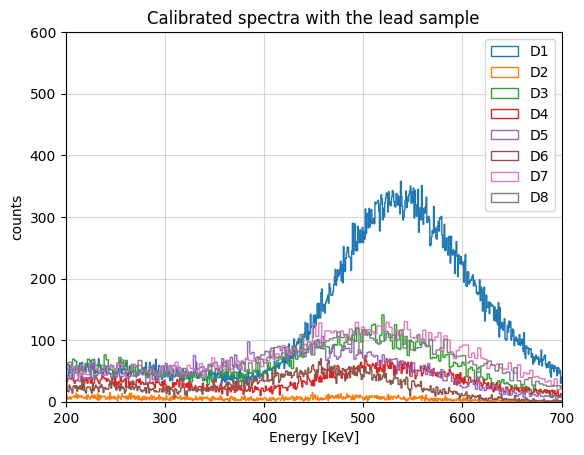

In [557]:
plt.hist(pb_d1_def, bins=int(pb_d1.max()), histtype='step', label='D1')
plt.hist(pb_d2_def, bins=int(pb_d2.max()), histtype='step', label='D2')
plt.hist(pb_d3_def, bins=int(pb_d3.max()), histtype='step', label='D3')
plt.hist(pb_d4_def, bins=int(pb_d4.max()), histtype='step', label='D4')
plt.hist(pb_d5_def, bins=int(pb_d5.max()), histtype='step', label='D5')
plt.hist(pb_d6_def, bins=int(pb_d6.max()), histtype='step', label='D6')
plt.hist(pb_d7_def, bins=int(pb_d7.max()), histtype='step', label='D7')
plt.hist(pb_d8_def, bins=int(pb_d8.max()), histtype='step', label='D8')
plt.title(r'Calibrated spectra with the lead sample')
plt.xlabel('Energy [KeV]')
plt.ylabel('counts')
plt.ylim(0, 600)
plt.xlim(200, 700)
plt.grid(alpha=0.5)
plt.legend()
plt.show()

In [558]:
fit_pb_d1 = bbb.normal(pb_d1_def, xmin=400, xmax=670, x1=0, x2=1000, b=int(pb_d1_def.max()/10), n=k)
fit_pb_d2 = bbb.normal(pb_d2_def, xmin=380, xmax=600, x1=0, x2=1000, b=int(pb_d2_def.max()/10), n=k)
fit_pb_d3 = bbb.normal(pb_d3_def, xmin=370, xmax=650, x1=0, x2=1000, b=int(pb_d3_def.max()/10), n=k)
fit_pb_d4 = bbb.normal(pb_d4_def, xmin=400, xmax=650, x1=0, x2=1000, b=int(pb_d4_def.max()/10), n=k)
fit_pb_d5 = bbb.normal(pb_d5_def, xmin=300, xmax=600, x1=0, x2=1000, b=int(pb_d5_def.max()/10), n=k)
fit_pb_d6 = bbb.normal(pb_d6_def, xmin=350, xmax=600, x1=0, x2=1000, b=int(pb_d6_def.max()/10), n=k)
fit_pb_d7 = bbb.normal(pb_d7_def, xmin=410, xmax=620, x1=0, x2=1000, b=int(pb_d7_def.max()/10), n=k)
fit_pb_d8 = bbb.normal(pb_d8_def, xmin=350, xmax=680, x1=0, x2=1000, b=int(pb_d8_def.max()/10), n=k)

#integrals dal det2 al det8
pb_int = np.array([fit_pb_d2[5][0], fit_pb_d3[5][0], fit_pb_d4[5][0], fit_pb_d5[5][0], fit_pb_d6[5][0], fit_pb_d7[5][0], fit_pb_d8[5][0]])
pb_int_err = np.array([fit_pb_d2[5][1], fit_pb_d3[5][1], fit_pb_d4[5][1], fit_pb_d5[5][1], fit_pb_d6[5][1], fit_pb_d7[5][1], fit_pb_d8[5][1]])

Parametri ottimizzati:
-----------------------------------------------
Ampiezza = 737353.6534332427 ± 9001.702040544018
Media = 540.7054064306845 ± 0.9369330363576598
Sigma = 69.21224419123274 ± 1.037630952494925
Chi-quadro = 208.9169026182588
Chi-quadro ridotto = 8.70487094242745
Integrale dell'istogramma nel range [402.28091804821906, 679.12989481315] = 71615 ± 267
Parametri ottimizzati:
-----------------------------------------------
Ampiezza = 23449.92899420721 ± 1078.626918928082
Media = 487.70849646835467 ± 3.431935251369109
Sigma = 82.75213625704949 ± 5.010787956618215
Chi-quadro = 26.06781686700461
Chi-quadro ridotto = 1.3719903614212952
Integrale dell'istogramma nel range [322.20422395425567, 653.2127689824537] = 2526 ± 50
Parametri ottimizzati:
-----------------------------------------------
Ampiezza = 108946.06697312849 ± 4110.58404457172
Media = 503.57496065973834 ± 3.391883357915347
Sigma = 86.20868200812997 ± 4.17436188040077
Chi-quadro = 180.6814453633857
Chi-quadro rido

In [559]:
#CALCOLO COEFFICIENTE ATTENUAZIONE PIOMBO
rho_pb = 0.01135 #g/mm^3
mu_pb = -(np.log(pb_int/hm_int))/(x_eff_lead*rho_pb) #mm^2/g
mu_pb_err = 1/(x_eff_lead*rho_pb) * np.sqrt((pb_int_err/pb_int)**2 + (hm_int_err/hm_int)**2)

#compatibilità tra di loro
pb_compat_crossed = np.zeros((7, 7), dtype=object)
for i in range(len(mu_pb)):
    for j in range(len(mu_pb)):
        if j == i:
            pb_compat_crossed[i, j] = ''
        else:
            pb_compat_crossed[i, j] = np.abs(mu_pb[i]-mu_pb[j])/np.sqrt(mu_pb_err[i]**2 + mu_pb_err[j]**2)

labels = ['d2', 'd3', 'd4', 'd5', 'd6', 'd7', 'd8']
df = pd.DataFrame(pb_compat_crossed, index=labels, columns=labels) #Creazione di un DataFrame per una rappresentazione tabellare
print(df)

#Compatibilità con il valore vero
mu_atteso = 16.14 #mm^2/g trovato sul sito: https://physics.nist.gov/cgi-bin/Xcom/xcom3_1
pb_compat = np.abs(mu_pb-mu_atteso)/mu_pb_err
print('\n')
for i in range(len(mu_pb)):
    if i == 0:
        print(f'mu{i+2} = 0{mu_pb[i]:.2f} ± {mu_pb_err[i]:.2f} mm^2/g \t compatibilità con il valore atteso: {pb_compat[i]}')
    else:
        print(f'mu{i+2} = {mu_pb[i]:.2f} ± {mu_pb_err[i]:.2f} mm^2/g \t compatibilità con il valore atteso: {pb_compat[i]}')
print('\n')
for i in range(len(mu_pb)):
    if i == 0:
        print(f'mu{i+2} = {10 * rho_pb * mu_pb[i]:.4f} ± {10 * rho_pb * mu_pb_err[i]:.4f} cm^(-1)')
    else:
        print(f'mu{i+2} = {10 * rho_pb * mu_pb[i]:.4f} ± {10 * rho_pb * mu_pb_err[i]:.4f} cm^(-1)')


           d2        d3        d4        d5        d6         d7        d8
d2             7.508443  7.930395  8.260137  9.721675  10.604128  8.847886
d3   7.508443            0.751694  1.240318  3.695191   5.094266  2.520215
d4   7.930395  0.751694             0.47273  2.917375   4.292319  1.809302
d5   8.260137  1.240318   0.47273            2.485743   3.873541  1.393231
d6   9.721675  3.695191  2.917375  2.485743              1.33356  0.907634
d7  10.604128  5.094266  4.292319  3.873541   1.33356             2.162914
d8   8.847886  2.520215  1.809302  1.393231  0.907634   2.162914          


mu2 = 09.91 ± 0.40 mm^2/g 	 compatibilità con il valore atteso: 15.450082254593145
mu3 = 13.27 ± 0.19 mm^2/g 	 compatibilità con il valore atteso: 14.788084484471591
mu4 = 13.48 ± 0.20 mm^2/g 	 compatibilità con il valore atteso: 13.301937317995328
mu5 = 13.61 ± 0.20 mm^2/g 	 compatibilità con il valore atteso: 12.928475129561583
mu6 = 14.32 ± 0.21 mm^2/g 	 compatibilità con il valore atteso: 8.

## POLIETILENE (maybe PMMA)

In [525]:
polyeth_d1 = uproot.open('data_imaging\\group23__30min_polietilene_21000+22000forward\\RAW\\DataR_CH0@DT5720B_781_group23__30min_polietilene_21000+22000forward.root')
polyeth_d2 = uproot.open('data_imaging\\group23__30min_polietilene_21000+22000forward\\RAW\\DataR_CH1@DT5720B_781_group23__30min_polietilene_21000+22000forward.root')
polyeth_d3 = uproot.open('data_imaging\\group23__30min_polietilene_21000+22000forward\\RAW\\DataR_CH2@DT5720B_781_group23__30min_polietilene_21000+22000forward.root')
polyeth_d4 = uproot.open('data_imaging\\group23__30min_polietilene_21000+22000forward\\RAW\\DataR_CH3@DT5720B_781_group23__30min_polietilene_21000+22000forward.root')
polyeth_d5 = uproot.open('data_imaging\\group23__30min_polietilene_21000+22000forward\\RAW\\DataR_CH0@DT5720B_467_group23__30min_polietilene_21000+22000forward.root')
polyeth_d6 = uproot.open('data_imaging\\group23__30min_polietilene_21000+22000forward\\RAW\\DataR_CH1@DT5720B_467_group23__30min_polietilene_21000+22000forward.root')
polyeth_d7 = uproot.open('data_imaging\\group23__30min_polietilene_21000+22000forward\\RAW\\DataR_CH2@DT5720B_467_group23__30min_polietilene_21000+22000forward.root')
polyeth_d8 = uproot.open('data_imaging\\group23__30min_polietilene_21000+22000forward\\RAW\\DataR_CH3@DT5720B_467_group23__30min_polietilene_21000+22000forward.root')

In [526]:
poly_d1 = np.asarray(polyeth_d1['Data_R;1']['Energy'].array())
poly_d1_calib = poly_d1*calibrazioneD1[0]+calibrazioneD1[1]
poly_d1_def = poly_d1_calib[poly_d1_calib != 0]

poly_d2 = np.asarray(polyeth_d2['Data_R;1']['Energy'].array())
poly_d2_calib = poly_d2*calibrazioneD2[0]+calibrazioneD2[1]
poly_d2_def = poly_d2_calib[poly_d2_calib != 0]

poly_d3 = np.asarray(polyeth_d3['Data_R;1']['Energy'].array())
poly_d3_calib = poly_d3 * calibrazioneD3[0] + calibrazioneD3[1]
poly_d3_def = poly_d3_calib[poly_d3_calib != 0]

poly_d4 = np.asarray(polyeth_d4['Data_R;1']['Energy'].array())
poly_d4_calib = poly_d4 * calibrazioneD4[0] + calibrazioneD4[1]
poly_d4_def = poly_d4_calib[poly_d4_calib != 0]

poly_d5 = np.asarray(polyeth_d5['Data_R;1']['Energy'].array())
poly_d5_calib = poly_d5 * calibrazioneD5[0] + calibrazioneD5[1]
poly_d5_def = poly_d5_calib[poly_d5_calib != 0]

poly_d6 = np.asarray(polyeth_d6['Data_R;1']['Energy'].array())
poly_d6_calib = poly_d6 * calibrazioneD6[0] + calibrazioneD6[1]
poly_d6_def = poly_d6_calib[poly_d6_calib != 0]

poly_d7 = np.asarray(polyeth_d7['Data_R;1']['Energy'].array())
poly_d7_calib = poly_d7 * calibrazioneD7[0] + calibrazioneD7[1]
poly_d7_def = poly_d7_calib[poly_d7_calib != 0]

poly_d8 = np.asarray(polyeth_d8['Data_R;1']['Energy'].array())
poly_d8_calib = poly_d8 * calibrazioneD8[0] + calibrazioneD8[1]
poly_d8_def = poly_d8_calib[poly_d8_calib != 0]

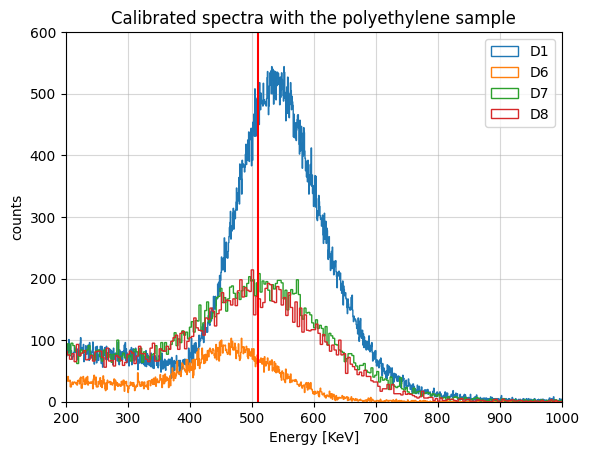

In [553]:
plt.hist(poly_d1_def, bins=int(poly_d1.max()), histtype='step', label='D1')
#plt.hist(poly_d2_def, bins=int(poly_d2.max()), histtype='step', label='D2')
#plt.hist(poly_d3_def, bins=int(poly_d3.max()), histtype='step', label='D3')
#plt.hist(poly_d4_def, bins=int(poly_d4.max()), histtype='step', label='D4')
#plt.hist(poly_d5_def, bins=int(poly_d5.max()), histtype='step', label='D5')
plt.hist(poly_d6_def, bins=int(poly_d6.max()), histtype='step', label='D6')
plt.hist(poly_d7_def, bins=int(poly_d7.max()), histtype='step', label='D7')
plt.hist(poly_d8_def, bins=int(poly_d8.max()), histtype='step', label='D8')
plt.axvline(x=511, color='red')
plt.title(r'Calibrated spectra with the polyethylene sample')
plt.xlabel('Energy [KeV]')
plt.ylabel('counts')
plt.ylim(0, 600)
plt.xlim(200, 1000)
plt.grid(alpha=0.5)
plt.legend()
plt.show()

In [528]:
print('Detector D1: ------------------ ')
fit_poly_d1 = bbb.normal(poly_d1_def, xmin=500, xmax=660, x1=0, x2=1000, b=int(poly_d1_def.max()/10), n=k)
print('Detector D2: ------------------ ')
fit_poly_d2 = bbb.normal(poly_d2_def, xmin=380, xmax=640, x1=0, x2=1000, b=int(poly_d2_def.max()/10), n=k)
print('Detector D3: ------------------ ')
fit_poly_d3 = bbb.normal(poly_d3_def, xmin=450, xmax=700, x1=0, x2=1000, b=int(poly_d3_def.max()/10), n=k)
print('Detector D4: ------------------ ')
fit_poly_d4 = bbb.normal(poly_d4_def, xmin=450, xmax=680, x1=0, x2=1000, b=int(poly_d4_def.max()/10), n=k)
print('Detector D5: ------------------ ')
fit_poly_d5 = bbb.normal(poly_d5_def, xmin=380, xmax=680, x1=0, x2=1000, b=int(poly_d5_def.max()/10), n=k)
print('Detector D6: ------------------ ')
fit_poly_d6 = bbb.normal(poly_d6_def, xmin=430, xmax=600, x1=0, x2=1000, b=int(poly_d6_def.max()/10), n=k)
print('Detector D7: ------------------ ')
fit_poly_d7 = bbb.normal(poly_d7_def, xmin=400, xmax=650, x1=0, x2=1000, b=int(poly_d7_def.max()/10), n=k)
print('Detector D8: ------------------ ')
fit_poly_d8 = bbb.normal(poly_d8_def, xmin=400, xmax=650, x1=0, x2=1000, b=int(poly_d8_def.max()/10), n=k)

#integrals dal det2 al det8
poly_int = np.array([fit_poly_d2[5][0], fit_poly_d3[5][0], fit_poly_d4[5][0], fit_poly_d5[5][0], fit_poly_d6[5][0], fit_poly_d7[5][0], fit_poly_d8[5][0]])
poly_int_err = np.array([fit_poly_d2[5][1], fit_poly_d3[5][1], fit_poly_d4[5][1], fit_poly_d5[5][1], fit_poly_d6[5][1], fit_poly_d7[5][1], fit_poly_d8[5][1]])

Detector D1: ------------------ 
Parametri ottimizzati:
-----------------------------------------------
Ampiezza = 1244353.0630152493 ± 38270.040809450256
Media = 535.4605631991562 ± 2.3119788473141782
Sigma = 74.62959516389377 ± 2.4071808530642334
Chi-quadro = 87.47236635462187
Chi-quadro ridotto = 6.7286435657401436
Integrale dell'istogramma nel range [386.2013728713687, 684.7197535269438] = 114609 ± 338
Detector D2: ------------------ 
Parametri ottimizzati:
-----------------------------------------------
Ampiezza = 41752.44974046509 ± 1285.1324520589076
Media = 479.04682222460093 ± 2.8264635451546454
Sigma = 92.7867493644322 ± 3.635019916043813
Chi-quadro = 26.324837992860463
Chi-quadro ridotto = 1.144558173602629
Integrale dell'istogramma nel range [293.4733234957365, 664.6203209534654] = 4564 ± 67
Detector D3: ------------------ 
Parametri ottimizzati:
-----------------------------------------------
Ampiezza = 171695.59301358814 ± 8950.673624477819
Media = 509.1396575111749 ± 4.9

In [584]:
#CALCOLO COEFFICIENTE ATTENUAZIONE POLIETILENE
rho_poly = 9.300E-04 #g/mm^3 Polietilene 
rho_pet = 1.380E-03 #g/mm^3 PET
rho_pmma = 1.190E-03 #g/mm^3 PMMA
rho_abs = 1.07E-03 #g/mm^3 ABS
rho_pc = 1.22E-03 #g/mm^3 PC

mu_poly = -(np.log(poly_int/hm_int))/(x_eff_pol*rho_poly) #mm^2/g
mu_poly_err = 1/(x_eff_pol*rho_poly) * np.sqrt((poly_int_err/poly_int)**2 + (hm_int_err/hm_int)**2)

mu_pet = -(np.log(poly_int/hm_int))/(x_eff_pol*rho_pet) #mm^2/g
mu_pet_err = 1/(x_eff_pol*rho_pet) * np.sqrt((poly_int_err/poly_int)**2 + (hm_int_err/hm_int)**2)

mu_pmma = -(np.log(poly_int/hm_int))/(x_eff_pol*rho_pmma) #mm^2/g
mu_pmma_err = 1/(x_eff_pol*rho_pmma) * np.sqrt((poly_int_err/poly_int)**2 + (hm_int_err/hm_int)**2)

mu_abs = -(np.log(poly_int/hm_int))/(x_eff_pol*rho_abs) #mm^2/g
mu_abs_err = 1/(x_eff_pol*rho_abs) * np.sqrt((poly_int_err/poly_int)**2 + (hm_int_err/hm_int)**2)

mu_pc = -(np.log(poly_int/hm_int))/(x_eff_pol*rho_pc) #mm^2/g
mu_pc_err = 1/(x_eff_pol*rho_pc) * np.sqrt((poly_int_err/poly_int)**2 + (hm_int_err/hm_int)**2)
#compatibilità tra di loro
poly_compat_crossed = np.zeros((7, 7), dtype=object)
for i in range(len(mu_poly)):
    for j in range(len(mu_poly)):
        if j == i:
            poly_compat_crossed[i, j] = ''
        else:
            poly_compat_crossed[i, j] = np.abs(mu_poly[i]-mu_poly[j])/np.sqrt(mu_poly_err[i]**2 + mu_poly_err[j]**2)

labels = ['d2', 'd3', 'd4', 'd5', 'd6', 'd7', 'd8']
df = pd.DataFrame(poly_compat_crossed, index=labels, columns=labels) #Creazione di un DataFrame per una rappresentazione tabellare
print(df)

#Compatibilità con il valore vero
mu_atteso_pol = 9.947 #mm^2/g trovato sul sito: https://physics.nist.gov/cgi-bin/Xcom/xcom3_1
mu_atteso_pmma = 9.410 #mm^2/g PMMA
mu_atteso_pet = 9.079 #mm^2/g PET
#mu_atteso_abs = 9.521 #mm^2/g ABS
mu_atteso_abs = 11.87 #mm^2/g ABS
mu_atteso_pc = 9.410 #mm^2/g ABS


poly_compat = np.abs(mu_poly-mu_atteso_pol)/mu_poly_err
pmma_compat = np.abs(mu_pmma-mu_atteso_pmma)/mu_pmma_err
pet_compat = np.abs(mu_pet-mu_atteso_pet)/mu_pet_err
abs_compat = np.abs(mu_abs-mu_atteso_abs)/mu_abs_err
pc_compat = np.abs(mu_pc-mu_atteso_pc)/mu_pc_err
print('\n')
print('Analisi per Polyethylene:')

for i in range(len(mu_poly)):
    if i == 0:
        print(f'mu{i+2} = 0{mu_poly[i]:.2f} ± {mu_poly_err[i]:.2f} mm^2/g  \t compatibilità con il valore atteso: {poly_compat[i]}')
    else:
        print(f'mu{i+2} = {mu_poly[i]:.2f} ± {mu_poly_err[i]:.2f} mm^2/g \t compatibilità con il valore atteso: {poly_compat[i]}')

print('\n')
print('Analisi per PET:')

for i in range(len(mu_pet)):
    if i == 0:
        print(f'mu{i+2} = 0{mu_pet[i]:.2f} ± {mu_pet_err[i]:.2f} mm^2/g  \t compatibilità con il valore atteso: {pet_compat[i]}')
    else:
        print(f'mu{i+2} = {mu_pet[i]:.2f} ± {mu_pet_err[i]:.2f} mm^2/g \t compatibilità con il valore atteso: {pet_compat[i]}')

print('\n')
print('Analisi per ABS:')

for i in range(len(mu_abs)):
    if i == 0:
        print(f'mu{i+2} = 0{mu_abs[i]:.2f} ± {mu_abs_err[i]:.2f} mm^2/g  \t compatibilità con il valore atteso: {abs_compat[i]}')
    else:
        print(f'mu{i+2} = {mu_abs[i]:.2f} ± {mu_abs_err[i]:.2f} mm^2/g \t compatibilità con il valore atteso: {abs_compat[i]}')

print('\n')
print('Analisi per PMMA:')

for i in range(len(mu_pmma)):
    if i == 0:
        print(f'mu{i+2} = 0{mu_pmma[i]:.2f} ± {mu_pmma_err[i]:.2f} mm^2/g  \t compatibilità con il valore atteso: {pmma_compat[i]}')
    else:
        print(f'mu{i+2} = {mu_pmma[i]:.2f} ± {mu_pmma_err[i]:.2f} mm^2/g \t compatibilità con il valore atteso: {pmma_compat[i]}')

print('\n')
print('Analisi per PC:')

for i in range(len(mu_pc)):
    if i == 0:
        print(f'mu{i+2} = 0{mu_pc[i]:.2f} ± {mu_pc_err[i]:.2f} mm^2/g  \t compatibilità con il valore atteso: {pc_compat[i]}')
    else:
        print(f'mu{i+2} = {mu_pc[i]:.2f} ± {mu_pc_err[i]:.2f} mm^2/g \t compatibilità con il valore atteso: {pc_compat[i]}')

print('\n')
print(f'mu atteso Polyethylene = {mu_atteso_pol * 10 * rho_poly} cm^(-1)')
print(f'mu atteso PMMA = {mu_atteso_pmma * 10 * rho_pmma} cm^(-1)')
print(f'mu atteso PET = {mu_atteso_pet * 10 * rho_pet} cm^(-1)')
print(f'mu atteso ABS = {mu_atteso_abs * 10 * rho_abs} cm^(-1)')
print(f'mu atteso PC = {mu_atteso_pc * 10 * rho_pc} cm^(-1)')
print('\n')

for i in range(len(mu_poly)):
    if i == 0:
        print(f'mu{i+2} = {10 * rho_poly * mu_poly[i]:.4f} ± {10 * rho_poly * mu_poly_err[i]:.4f} cm^(-1)')
    else:
        print(f'mu{i+2} = {10 * rho_poly * mu_poly[i]:.4f} ± {10 * rho_poly * mu_poly_err[i]:.4f} cm^(-1)')

           d2         d3         d4         d5         d6         d7        d8
d2             13.908367  12.341961  17.439099  15.003461  15.877911  15.65926
d3  13.908367              2.414482   5.721159   1.997613   3.321347  3.526604
d4  12.341961   2.414482              8.051721   4.319837   5.648224  5.679491
d5  17.439099   5.721159   8.051721              3.574113    2.30663  1.683686
d6  15.003461   1.997613   4.319837   3.574113              1.270157  1.624592
d7  15.877911   3.321347   5.648224    2.30663   1.270157             0.448299
d8   15.65926   3.526604   5.679491   1.683686   1.624592   0.448299          


Analisi per Polyethylene:
mu2 = 00.71 ± 1.04 mm^2/g  	 compatibilità con il valore atteso: 8.914423516526039
mu3 = 16.79 ± 0.51 mm^2/g 	 compatibilità con il valore atteso: 13.359626864941877
mu4 = 15.02 ± 0.52 mm^2/g 	 compatibilità con il valore atteso: 9.749602344372237
mu5 = 20.99 ± 0.53 mm^2/g 	 compatibilità con il valore atteso: 20.9236254986217
mu6 = 18.28

## FERRO

In [530]:
iron_d1 = uproot.open('data_imaging\\group23_30min_iron_31500+22500forward\\RAW\\DataR_CH0@DT5720B_781_group23_30min_iron_31500+22500forward.root')
iron_d2 = uproot.open('data_imaging\\group23_30min_iron_31500+22500forward\\RAW\\DataR_CH1@DT5720B_781_group23_30min_iron_31500+22500forward.root')
iron_d3 = uproot.open('data_imaging\\group23_30min_iron_31500+22500forward\\RAW\\DataR_CH2@DT5720B_781_group23_30min_iron_31500+22500forward.root')
iron_d4 = uproot.open('data_imaging\\group23_30min_iron_31500+22500forward\\RAW\\DataR_CH3@DT5720B_781_group23_30min_iron_31500+22500forward.root')
iron_d5 = uproot.open('data_imaging\\group23_30min_iron_31500+22500forward\\RAW\\DataR_CH0@DT5720B_467_group23_30min_iron_31500+22500forward.root')
iron_d6 = uproot.open('data_imaging\\group23_30min_iron_31500+22500forward\\RAW\\DataR_CH1@DT5720B_467_group23_30min_iron_31500+22500forward.root')
iron_d7 = uproot.open('data_imaging\\group23_30min_iron_31500+22500forward\\RAW\\DataR_CH2@DT5720B_467_group23_30min_iron_31500+22500forward.root')
iron_d8 = uproot.open('data_imaging\\group23_30min_iron_31500+22500forward\\RAW\\DataR_CH3@DT5720B_467_group23_30min_iron_31500+22500forward.root')

In [531]:
iron_d1 = np.asarray(iron_d1['Data_R;1']['Energy'].array())
iron_d1_calib = iron_d1*calibrazioneD1[0]+calibrazioneD1[1]
iron_d1_def = iron_d1_calib[iron_d1_calib != 0]

iron_d2 = np.asarray(iron_d2['Data_R;1']['Energy'].array())
iron_d2_calib = iron_d2*calibrazioneD2[0]+calibrazioneD2[1]
iron_d2_def = iron_d2_calib[iron_d2_calib != 0]

iron_d3 = np.asarray(iron_d3['Data_R;1']['Energy'].array())
iron_d3_calib = iron_d3 * calibrazioneD3[0] + calibrazioneD3[1]
iron_d3_def = iron_d3_calib[iron_d3_calib != 0]

iron_d4 = np.asarray(iron_d4['Data_R;1']['Energy'].array())
iron_d4_calib = iron_d4 * calibrazioneD4[0] + calibrazioneD4[1]
iron_d4_def = iron_d4_calib[iron_d4_calib != 0]

iron_d5 = np.asarray(iron_d5['Data_R;1']['Energy'].array())
iron_d5_calib = iron_d5 * calibrazioneD5[0] + calibrazioneD5[1]
iron_d5_def = iron_d5_calib[iron_d5_calib != 0]

iron_d6 = np.asarray(iron_d6['Data_R;1']['Energy'].array())
iron_d6_calib = iron_d6 * calibrazioneD6[0] + calibrazioneD6[1]
iron_d6_def = iron_d6_calib[iron_d6_calib != 0]

iron_d7 = np.asarray(iron_d7['Data_R;1']['Energy'].array())
iron_d7_calib = iron_d7 * calibrazioneD7[0] + calibrazioneD7[1]
iron_d7_def = iron_d7_calib[iron_d7_calib != 0]

iron_d8 = np.asarray(iron_d8['Data_R;1']['Energy'].array())
iron_d8_calib = iron_d8 * calibrazioneD8[0] + calibrazioneD8[1]
iron_d8_def = iron_d8_calib[iron_d8_calib != 0]

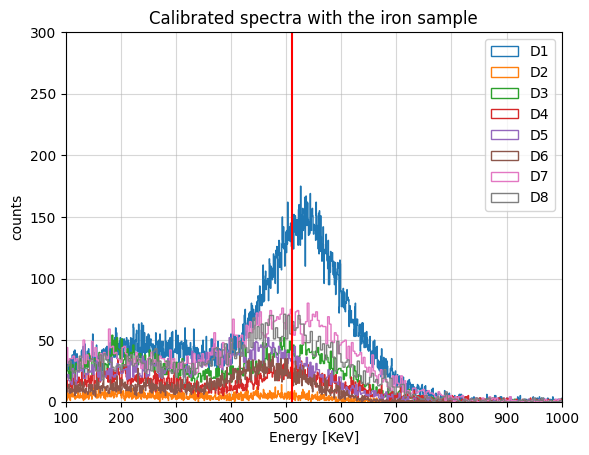

In [551]:
plt.hist(iron_d1_def, bins=int(iron_d1.max()), histtype='step', label='D1')
plt.hist(iron_d2_def, bins=int(iron_d2.max()), histtype='step', label='D2')
plt.hist(iron_d3_def, bins=int(iron_d3.max()), histtype='step', label='D3')
plt.hist(iron_d4_def, bins=int(iron_d4.max()), histtype='step', label='D4')
plt.hist(iron_d5_def, bins=int(iron_d5.max()), histtype='step', label='D5')
plt.hist(iron_d6_def, bins=int(iron_d6.max()), histtype='step', label='D6')
plt.hist(iron_d7_def, bins=int(iron_d7.max()), histtype='step', label='D7')
plt.hist(iron_d8_def, bins=int(iron_d8.max()), histtype='step', label='D8')
plt.axvline(x=511, color='red')
plt.title(r'Calibrated spectra with the iron sample')
plt.xlabel('Energy [KeV]')
plt.ylabel('counts')
plt.ylim(0, 300)
plt.xlim(100, 1000)
plt.grid(alpha=0.5)
plt.legend()
plt.show()

In [533]:
print('Detector D1: ------------------ ')
fit_iron_d1 = bbb.normal(iron_d1_def, xmin=500, xmax=660, x1=0, x2=1000, b=int(iron_d1_def.max()/10), n=k)
print('Detector D2: ------------------ ')
fit_iron_d2 = bbb.normal(iron_d2_def, xmin=400, xmax=640, x1=0, x2=1000, b=int(iron_d2_def.max()/10), n=k)
print('Detector D3: ------------------ ')
fit_iron_d3 = bbb.normal(iron_d3_def, xmin=450, xmax=680, x1=0, x2=1000, b=int(iron_d3_def.max()/10), n=k)
print('Detector D4: ------------------ ')
fit_iron_d4 = bbb.normal(iron_d4_def, xmin=450, xmax=690, x1=0, x2=1000, b=int(iron_d4_def.max()/10), n=k)
print('Detector D5: ------------------ ')
fit_iron_d5 = bbb.normal(iron_d5_def, xmin=400, xmax=690, x1=0, x2=1000, b=int(iron_d5_def.max()/10), n=k)
print('Detector D6: ------------------ ')
fit_iron_d6 = bbb.normal(iron_d6_def, xmin=410, xmax=600, x1=0, x2=1000, b=int(iron_d6_def.max()/10), n=k)
print('Detector D7: ------------------ ')
fit_iron_d7 = bbb.normal(iron_d7_def, xmin=410, xmax=680, x1=0, x2=1000, b=int(iron_d7_def.max()/10), n=k)
print('Detector D8: ------------------ ')
fit_iron_d8 = bbb.normal(iron_d8_def, xmin=400, xmax=690, x1=0, x2=1000, b=int(iron_d8_def.max()/10), n=k)

#integrals dal det2 al det8
iron_int = np.array([fit_iron_d2[5][0], fit_iron_d3[5][0], fit_iron_d4[5][0], fit_iron_d5[5][0], fit_iron_d6[5][0], fit_iron_d7[5][0], fit_iron_d8[5][0]])
iron_int_err = np.array([fit_iron_d2[5][1], fit_iron_d3[5][1], fit_iron_d4[5][1], fit_iron_d5[5][1], fit_iron_d6[5][1], fit_iron_d7[5][1], fit_iron_d8[5][1]])

Detector D1: ------------------ 
Parametri ottimizzati:
-----------------------------------------------
Ampiezza = 363526.9293724697 ± 12580.919107290369
Media = 526.8261650526442 ± 2.7666452860140294
Sigma = 75.70959935097041 ± 2.535206791916941
Chi-quadro = 24.954764194606568
Chi-quadro ridotto = 1.9195972457389667
Integrale dell'istogramma nel range [375.40696635070344, 678.245363754585] = 34727 ± 186
Detector D2: ------------------ 
Parametri ottimizzati:
-----------------------------------------------
Ampiezza = 18404.818218994114 ± 1241.3262605668508
Media = 471.1710719470673 ± 6.1226348330834375
Sigma = 85.83244120121788 ± 6.879231857355615
Chi-quadro = 29.981219537971945
Chi-quadro ridotto = 1.427677120855807
Integrale dell'istogramma nel range [299.5061895446315, 642.835954349503] = 2066 ± 45
Detector D3: ------------------ 
Parametri ottimizzati:
-----------------------------------------------
Ampiezza = 43614.506597259395 ± 2686.231454952728
Media = 513.5106868008128 ± 5.726

In [534]:
#CALCOLO COEFFICIENTE ATTENUAZIONE FERRO
rho_iron = 7.874E-03 #g/mm^3
#rho_iron = 8.050E-03 #g/mm^3 #iron alloy
mu_iron = -(np.log(iron_int/hm_int))/(x_eff_iron*rho_iron) #mm^2/g
mu_iron_err = 1/(x_eff_iron*rho_iron) * np.sqrt((iron_int_err/iron_int)**2 + (hm_int_err/hm_int)**2)

#compatibilità tra di loro
iron_compat_crossed = np.zeros((7, 7), dtype=object)
for i in range(len(mu_iron)):
    for j in range(len(mu_iron)):
        if j == i:
            iron_compat_crossed[i, j] = ''
        else:
            iron_compat_crossed[i, j] = np.abs(mu_iron[i]-mu_iron[j])/np.sqrt(mu_iron_err[i]**2 + mu_iron_err[j]**2)

labels = ['d2', 'd3', 'd4', 'd5', 'd6', 'd7', 'd8']
df = pd.DataFrame(iron_compat_crossed, index=labels, columns=labels) #Creazione di un DataFrame per una rappresentazione tabellare
print(df)

#Compatibilità con il valore vero
mu_atteso = 8.414 #mm^2/g trovato sul sito: https://physics.nist.gov/cgi-bin/Xcom/xcom3_1

print('\n')
print(f'mu_atteso (cm^(-1)) = {mu_atteso * rho_iron * 10}')

iron_compat = np.abs(mu_iron-mu_atteso)/mu_iron_err
print('\n')
for i in range(len(mu_iron)):
    if i == 0:
        print(f'mu{i+2} = {mu_iron[i]:.2f} ± {mu_iron_err[i]:.2f} mm^2/g  \t compatibilità con il valore atteso: {iron_compat[i]}')
    else:
        print(f'mu{i+2} = {mu_iron[i]:.2f} ± {mu_iron_err[i]:.2f} mm^2/g \t compatibilità con il valore atteso: {iron_compat[i]}')
print('\n')
for i in range(len(mu_iron)):
    if i == 0:
        print(f'mu{i+2} = {10 * rho_iron * mu_iron[i]:.4f} ± {10 * rho_iron * mu_iron_err[i]:.4f} cm^(-1)')
    else:
        print(f'mu{i+2} = {10 * rho_iron * mu_iron[i]:.4f} ± {10 * rho_iron * mu_iron_err[i]:.4f} cm^(-1)')

           d2         d3         d4         d5         d6         d7  \
d2               28.6942  24.712743  27.926526  22.876177  21.619421   
d3    28.6942              5.727125   1.244572   8.246944  10.403911   
d4  24.712743   5.727125              4.519869   2.554294    4.65005   
d5  27.926526   1.244572   4.519869              7.063749   9.224324   
d6  22.876177   8.246944   2.554294   7.063749                2.0529   
d7  21.619421  10.403911    4.65005   9.224324     2.0529              
d8  23.316478   5.881839   0.551373   4.755389   1.821874   3.749869   

           d8  
d2  23.316478  
d3   5.881839  
d4   0.551373  
d5   4.755389  
d6   1.821874  
d7   3.749869  
d8             


mu_atteso (cm^(-1)) = 0.6625183600000001


mu2 = 9.51 ± 0.31 mm^2/g  	 compatibilità con il valore atteso: 3.5453617595845763
mu3 = 20.02 ± 0.20 mm^2/g 	 compatibilità con il valore atteso: 59.43938668567554
mu4 = 18.47 ± 0.19 mm^2/g 	 compatibilità con il valore atteso: 53.47711301116911
mu5

## ALLUMINIO

In [535]:
alluminio_d1 = uproot.open('data_imaging\\group23_30min_aluminum_21000forward\\RAW\\DataR_CH0@DT5720B_781_group23__30min_lead_21000forward.root')
alluminio_d2 = uproot.open('data_imaging\\group23_30min_aluminum_21000forward\\RAW\\DataR_CH1@DT5720B_781_group23__30min_lead_21000forward.root')
alluminio_d3 = uproot.open('data_imaging\\group23_30min_aluminum_21000forward\\RAW\\DataR_CH2@DT5720B_781_group23__30min_lead_21000forward.root')
alluminio_d4 = uproot.open('data_imaging\\group23_30min_aluminum_21000forward\\RAW\\DataR_CH3@DT5720B_781_group23__30min_lead_21000forward.root')
alluminio_d5 = uproot.open('data_imaging\\group23_30min_aluminum_21000forward\\RAW\\DataR_CH0@DT5720B_467_group23__30min_lead_21000forward.root')
alluminio_d6 = uproot.open('data_imaging\\group23_30min_aluminum_21000forward\\RAW\\DataR_CH1@DT5720B_467_group23__30min_lead_21000forward.root')
alluminio_d7 = uproot.open('data_imaging\\group23_30min_aluminum_21000forward\\RAW\\DataR_CH2@DT5720B_467_group23__30min_lead_21000forward.root')
alluminio_d8 = uproot.open('data_imaging\\group23_30min_aluminum_21000forward\\RAW\\DataR_CH3@DT5720B_467_group23__30min_lead_21000forward.root')

In [536]:
al_d1 = np.asarray(alluminio_d1['Data_R;1']['Energy'].array())
al_d1_calib = al_d1*calibrazioneD1[0]+calibrazioneD1[1]
al_d1_def = al_d1_calib[al_d1_calib != 0]

al_d2 = np.asarray(alluminio_d2['Data_R;1']['Energy'].array())
al_d2_calib = al_d2*calibrazioneD2[0]+calibrazioneD2[1]
al_d2_def = al_d2_calib[al_d2_calib != 0]

al_d3 = np.asarray(alluminio_d3['Data_R;1']['Energy'].array())
al_d3_calib = al_d3 * calibrazioneD3[0] + calibrazioneD3[1]
al_d3_def = al_d3_calib[al_d3_calib != 0]

al_d4 = np.asarray(alluminio_d4['Data_R;1']['Energy'].array())
al_d4_calib = al_d4 * calibrazioneD4[0] + calibrazioneD4[1]
al_d4_def = al_d4_calib[al_d4_calib != 0]

al_d5 = np.asarray(alluminio_d5['Data_R;1']['Energy'].array())
al_d5_calib = al_d5 * calibrazioneD5[0] + calibrazioneD5[1]
al_d5_def = al_d5_calib[al_d5_calib != 0]

al_d6 = np.asarray(alluminio_d6['Data_R;1']['Energy'].array())
al_d6_calib = al_d6 * calibrazioneD6[0] + calibrazioneD6[1]
al_d6_def = al_d6_calib[al_d6_calib != 0]

al_d7 = np.asarray(alluminio_d7['Data_R;1']['Energy'].array())
al_d7_calib = al_d7 * calibrazioneD7[0] + calibrazioneD7[1]
al_d7_def = al_d7_calib[al_d7_calib != 0]

al_d8 = np.asarray(alluminio_d8['Data_R;1']['Energy'].array())
al_d8_calib = al_d8 * calibrazioneD8[0] + calibrazioneD8[1]
al_d8_def = al_d8_calib[al_d8_calib != 0]


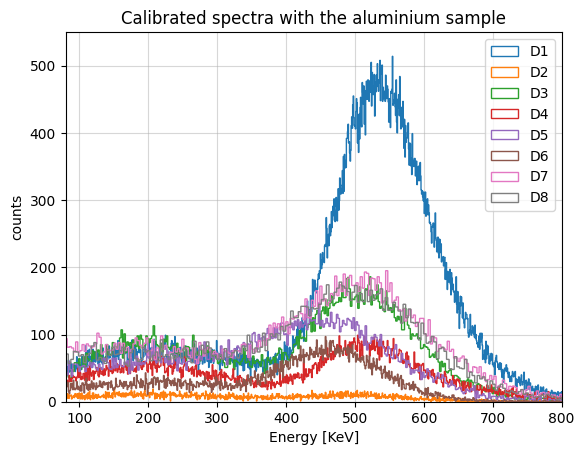

In [537]:
plt.hist(al_d1_def, bins=int(al_d1.max()), histtype='step', label='D1')
plt.hist(al_d2_def, bins=int(al_d2.max()), histtype='step', label='D2')
plt.hist(al_d3_def, bins=int(al_d3.max()), histtype='step', label='D3')
plt.hist(al_d4_def, bins=int(al_d4.max()), histtype='step', label='D4')
plt.hist(al_d5_def, bins=int(al_d5.max()), histtype='step', label='D5')
plt.hist(al_d6_def, bins=int(al_d6.max()), histtype='step', label='D6')
plt.hist(al_d7_def, bins=int(al_d7.max()), histtype='step', label='D7')
plt.hist(al_d8_def, bins=int(al_d8.max()), histtype='step', label='D8')
plt.title(r'Calibrated spectra with the aluminium sample')
plt.xlabel('Energy [KeV]')
plt.ylabel('counts')
plt.ylim(0, 550)
plt.xlim(80, 800)
plt.grid(alpha=0.5)
plt.legend()
plt.show()

In [538]:
fit_al_d1 = bbb.normal(al_d1_def, xmin=400, xmax=670, x1=0, x2=1000, b=int(al_d1_def.max()/10), n=k)
fit_al_d2 = bbb.normal(al_d2_def, xmin=380, xmax=590, x1=0, x2=1000, b=int(al_d2_def.max()/10), n=k)
fit_al_d3 = bbb.normal(al_d3_def, xmin=350, xmax=650, x1=0, x2=1000, b=int(al_d3_def.max()/10), n=k)
fit_al_d4 = bbb.normal(al_d4_def, xmin=400, xmax=650, x1=0, x2=1000, b=int(al_d4_def.max()/10), n=k)
fit_al_d5 = bbb.normal(al_d5_def, xmin=300, xmax=600, x1=0, x2=1000, b=int(al_d5_def.max()/10), n=k)
fit_al_d6 = bbb.normal(al_d6_def, xmin=350, xmax=600, x1=0, x2=1000, b=int(al_d6_def.max()/10), n=k)
fit_al_d7 = bbb.normal(al_d7_def, xmin=380, xmax=650, x1=0, x2=1000, b=int(al_d7_def.max()/10), n=k)
fit_al_d8 = bbb.normal(al_d8_def, xmin=400, xmax=850, x1=0, x2=1000, b=int(al_d8_def.max()/10), n=k)

#integrals dal det2 al det8
al_int = np.array([fit_al_d2[5][0], fit_al_d3[5][0], fit_al_d4[5][0], fit_al_d5[5][0], fit_al_d6[5][0], fit_al_d7[5][0], fit_al_d8[5][0]])
al_int_err = np.array([fit_al_d2[5][1], fit_al_d3[5][1], fit_al_d4[5][1], fit_al_d5[5][1], fit_al_d6[5][1], fit_al_d7[5][1], fit_al_d8[5][1]])

Parametri ottimizzati:
-----------------------------------------------
Ampiezza = 1059342.7030448364 ± 12413.995161286932
Media = 538.0790323306069 ± 0.8975515996836151
Sigma = 69.00439684473594 ± 0.9917016180449368
Chi-quadro = 267.1422244897637
Chi-quadro ridotto = 11.13092602040682
Integrale dell'istogramma nel range [400.070238641135, 676.0878260200788] = 103029 ± 320
Parametri ottimizzati:
-----------------------------------------------
Ampiezza = 37070.57481714247 ± 2384.6482865160933
Media = 481.64589737557606 ± 4.548277809079008
Sigma = 94.51737254171806 ± 7.848758750173004
Chi-quadro = 34.01539950816018
Chi-quadro ridotto = 1.88974441712001
Integrale dell'istogramma nel range [292.61115229213993, 670.6806424590122] = 4070 ± 63
Parametri ottimizzati:
-----------------------------------------------
Ampiezza = 161454.4320727265 ± 5526.086535783052
Media = 502.3271950005968 ± 3.1524237951647396
Sigma = 85.44036428944473 ± 3.681521771851248
Chi-quadro = 299.7092364309112
Chi-quadro

In [539]:
#CALCOLO COEFFICIENTE ATTENUAZIONE ALLUMINIO
rho_al = 0.0027  #g/mm^3
mu_al = -(np.log(al_int/hm_int))/(x_eff_alu*rho_al) #mm^2/g
mu_al_err = 1/(x_eff_alu*rho_al) * np.sqrt((al_int_err/al_int)**2 + (hm_int_err/hm_int)**2)

#compatibilità tra di loro
al_compat_crossed = np.zeros((7, 7), dtype=object)
for i in range(len(mu_al)):
    for j in range(len(mu_al)):
        if j == i:
            al_compat_crossed[i, j] = ''
        else:
            al_compat_crossed[i, j] = np.abs(mu_al[i]-mu_al[j])/np.sqrt(mu_al_err[i]**2 + mu_al_err[j]**2)

labels = ['d2', 'd3', 'd4', 'd5', 'd6', 'd7', 'd8']
df = pd.DataFrame(al_compat_crossed, index=labels, columns=labels) #Creazione di un DataFrame per una rappresentazione tabellare
print(df)

#Compatibilità con il valore vero
mu_atteso = 8.445  #mm^2/g trovato sul sito: https://physics.nist.gov/cgi-bin/Xcom/xcom3_1
al_compat = np.abs(mu_al-mu_atteso)/mu_al_err
print('\n')
for i in range(len(mu_al)):
    if i == 0:
        print(f'mu{i+2} = 0{mu_al[i]:.2f} ± {mu_al_err[i]:.2f} mm^2/g \t compatibilità con il valore atteso: {al_compat[i]}')
    else:
        print(f'mu{i+2} = {mu_al[i]:.2f} ± {mu_al_err[i]:.2f} mm^2/g \t compatibilità con il valore atteso: {al_compat[i]}')

print('\n')
for i in range(len(mu_al)):
    if i == 0:
        print(f'mu{i+2} = {10 * rho_al * mu_al[i]:.4f} ± {10 * rho_al * mu_al_err[i]:.4f} cm^(-1)')
    else:
        print(f'mu{i+2} = {10 * rho_al * mu_al[i]:.4f} ± {10 * rho_al * mu_al_err[i]:.4f} cm^(-1)')


           d2         d3         d4        d5         d6         d7         d8
d2             12.103013  13.054311  13.61429  14.377522  15.332486  12.400518
d3  12.103013              1.628819  2.474156   3.830963   5.315244    1.18412
d4  13.054311   1.628819             0.820779   2.200325   3.657518   0.310468
d5   13.61429   2.474156   0.820779             1.409622   2.874225   1.068454
d6  14.377522   3.830963   2.200325  1.409622              1.424494   2.340326
d7  15.332486   5.315244   3.657518  2.874225   1.424494              3.687148
d8  12.400518    1.18412   0.310468  1.068454   2.340326   3.687148           


mu2 = 02.21 ± 0.37 mm^2/g 	 compatibilità con il valore atteso: 16.985934155797583
mu3 = 7.16 ± 0.18 mm^2/g 	 compatibilità con il valore atteso: 7.11514621442159
mu4 = 7.58 ± 0.19 mm^2/g 	 compatibilità con il valore atteso: 4.628662919791579
mu5 = 7.80 ± 0.18 mm^2/g 	 compatibilità con il valore atteso: 3.52489802622686
mu6 = 8.17 ± 0.19 mm^2/g 	 compatibilità c

## GRAFITE

In [540]:
grafite_d1 = uproot.open('data_imaging\\group23_30min_graphite_31500forward\\RAW\\DataR_CH0@DT5720B_781_group23_30min_graphite_31500forward.root')
grafite_d2 = uproot.open('data_imaging\\group23_30min_graphite_31500forward\\RAW\\DataR_CH1@DT5720B_781_group23_30min_graphite_31500forward.root')
grafite_d3 = uproot.open('data_imaging\\group23_30min_graphite_31500forward\\RAW\\DataR_CH2@DT5720B_781_group23_30min_graphite_31500forward.root')
grafite_d4 = uproot.open('data_imaging\\group23_30min_graphite_31500forward\\RAW\\DataR_CH3@DT5720B_781_group23_30min_graphite_31500forward.root')
grafite_d5 = uproot.open('data_imaging\\group23_30min_graphite_31500forward\\RAW\\DataR_CH0@DT5720B_467_group23_30min_graphite_31500forward.root')
grafite_d6 = uproot.open('data_imaging\\group23_30min_graphite_31500forward\\RAW\\DataR_CH1@DT5720B_467_group23_30min_graphite_31500forward.root')
grafite_d7 = uproot.open('data_imaging\\group23_30min_graphite_31500forward\\RAW\\DataR_CH2@DT5720B_467_group23_30min_graphite_31500forward.root')
grafite_d8 = uproot.open('data_imaging\\group23_30min_graphite_31500forward\\RAW\\DataR_CH3@DT5720B_467_group23_30min_graphite_31500forward.root')


In [541]:
gr_d1 = np.asarray(grafite_d1['Data_R;1']['Energy'].array())
gr_d1_calib = gr_d1*calibrazioneD1[0]+calibrazioneD1[1]
gr_d1_def = gr_d1_calib[gr_d1_calib != 0]

gr_d2 = np.asarray(grafite_d2['Data_R;1']['Energy'].array())
gr_d2_calib = gr_d2*calibrazioneD2[0]+calibrazioneD2[1]
gr_d2_def = gr_d2_calib[gr_d2_calib != 0]

gr_d3 = np.asarray(grafite_d3['Data_R;1']['Energy'].array())
gr_d3_calib = gr_d3 * calibrazioneD3[0] + calibrazioneD3[1]
gr_d3_def = gr_d3_calib[gr_d3_calib != 0]

gr_d4 = np.asarray(grafite_d4['Data_R;1']['Energy'].array())
gr_d4_calib = gr_d4 * calibrazioneD4[0] + calibrazioneD4[1]
gr_d4_def = gr_d4_calib[gr_d4_calib != 0]

gr_d5 = np.asarray(grafite_d5['Data_R;1']['Energy'].array())
gr_d5_calib = gr_d5 * calibrazioneD5[0] + calibrazioneD5[1]
gr_d5_def = gr_d5_calib[gr_d5_calib != 0]

gr_d6 = np.asarray(grafite_d6['Data_R;1']['Energy'].array())
gr_d6_calib = gr_d6 * calibrazioneD6[0] + calibrazioneD6[1]
gr_d6_def = gr_d6_calib[gr_d6_calib != 0]

gr_d7 = np.asarray(grafite_d7['Data_R;1']['Energy'].array())
gr_d7_calib = gr_d7 * calibrazioneD7[0] + calibrazioneD7[1]
gr_d7_def = gr_d7_calib[gr_d7_calib != 0]

gr_d8 = np.asarray(grafite_d8['Data_R;1']['Energy'].array())
gr_d8_calib = gr_d8 * calibrazioneD8[0] + calibrazioneD8[1]
gr_d8_def = gr_d8_calib[gr_d8_calib != 0]


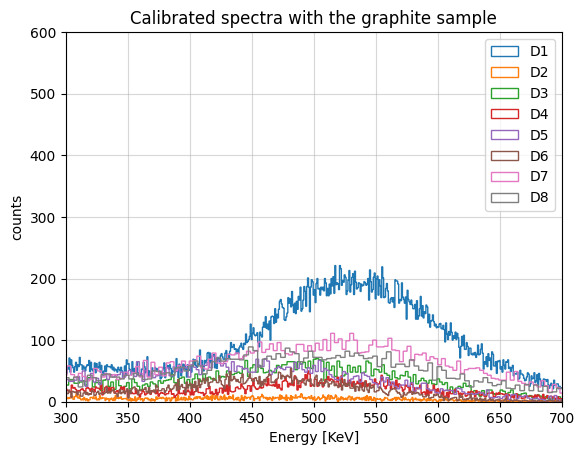

In [568]:
plt.hist(gr_d1_def, bins=int(gr_d1.max()), histtype='step', label='D1')
plt.hist(gr_d2_def, bins=int(gr_d2.max()), histtype='step', label='D2')
plt.hist(gr_d3_def, bins=int(gr_d3.max()), histtype='step', label='D3')
plt.hist(gr_d4_def, bins=int(gr_d4.max()), histtype='step', label='D4')
plt.hist(gr_d5_def, bins=int(gr_d5.max()), histtype='step', label='D5')
plt.hist(gr_d6_def, bins=int(gr_d6.max()), histtype='step', label='D6')
plt.hist(gr_d7_def, bins=int(gr_d7.max()), histtype='step', label='D7')
plt.hist(gr_d8_def, bins=int(gr_d8.max()), histtype='step', label='D8')
plt.title(r'Calibrated spectra with the graphite sample')
plt.xlabel('Energy [KeV]')
plt.ylabel('counts')
plt.ylim(0, 600)
plt.xlim(300, 700)
plt.grid(alpha=0.5)
plt.legend()
plt.show()

Parametri ottimizzati:
-----------------------------------------------
Ampiezza = 479106.69082948024 ± 5533.195995496752
Media = 530.5148312790594 ± 0.9417697416753217
Sigma = 75.44279394223851 ± 1.0947535615995176
Chi-quadro = 114.22071498676489
Chi-quadro ridotto = 4.75919645778187
Integrale dell'istogramma nel range [379.62924339458243, 681.4004191635364] = 46768 ± 216


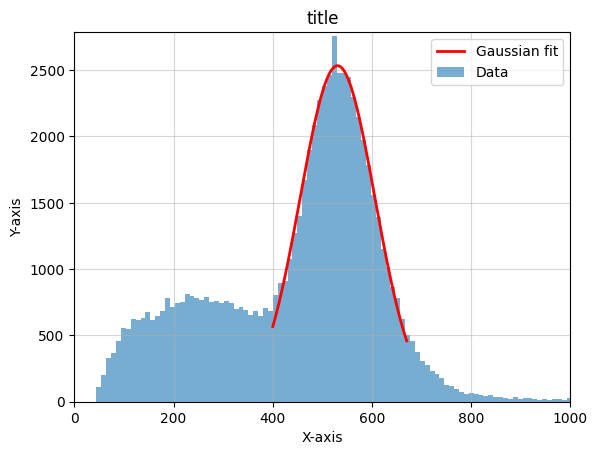

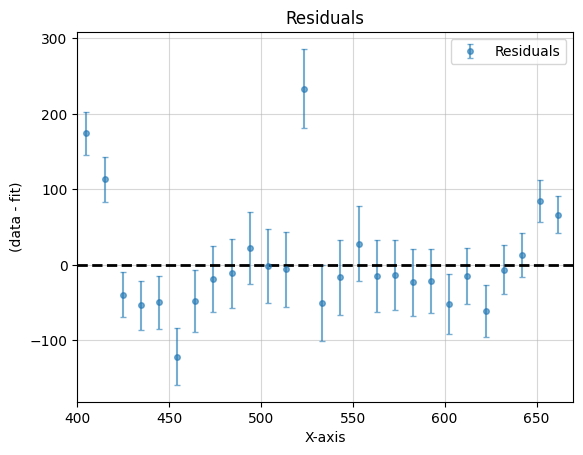

Parametri ottimizzati:
-----------------------------------------------
Ampiezza = 36861.23215744839 ± 2097.031180140567
Media = 481.45396123904686 ± 4.286002852163773
Sigma = 93.84654334548638 ± 6.929981529680477
Chi-quadro = 33.99393274931734
Chi-quadro ridotto = 1.7891543552272282
Integrale dell'istogramma nel range [293.76087454807407, 669.1470479300197] = 4070 ± 63
Parametri ottimizzati:
-----------------------------------------------
Ampiezza = 158846.95941865502 ± 5700.799489222092
Media = 503.3876345782128 ± 3.1703773946127143
Sigma = 83.42943974582298 ± 3.8134568406193723
Chi-quadro = 263.96258080250874
Chi-quadro ridotto = 10.55850323210035
Integrale dell'istogramma nel range [336.52875508656683, 670.2465140698587] = 15808 ± 125
Parametri ottimizzati:
-----------------------------------------------
Ampiezza = 153725.014088044 ± 3322.1211740910326
Media = 515.2813597448918 ± 1.75257905459691
Sigma = 79.28669110584072 ± 2.2158710463397346
Chi-quadro = 70.7835209913851
Chi-quadro

In [560]:
fit_gr_d1 = bbb.normal(gr_d1_def, xmin=400, xmax=670, x1=0, x2=1000, b=int(gr_d1_def.max()/10), n=2, plot='yes')
fit_gr_d2 = bbb.normal(al_d2_def, xmin=380, xmax=600, x1=0, x2=1000, b=int(al_d2_def.max()/10), n=k)
fit_gr_d3 = bbb.normal(al_d3_def, xmin=370, xmax=650, x1=0, x2=1000, b=int(al_d3_def.max()/10), n=k)
fit_gr_d4 = bbb.normal(al_d4_def, xmin=400, xmax=650, x1=0, x2=1000, b=int(al_d4_def.max()/10), n=k)
fit_gr_d5 = bbb.normal(al_d5_def, xmin=300, xmax=600, x1=0, x2=1000, b=int(al_d5_def.max()/10), n=k)
fit_gr_d6 = bbb.normal(al_d6_def, xmin=350, xmax=600, x1=0, x2=1000, b=int(al_d6_def.max()/10), n=k)
fit_gr_d7 = bbb.normal(al_d7_def, xmin=380, xmax=650, x1=0, x2=1000, b=int(al_d7_def.max()/10), n=k)
fit_gr_d8 = bbb.normal(al_d8_def, xmin=400, xmax=850, x1=0, x2=1000, b=int(al_d8_def.max()/10), n=k)

#integrals dal det2 al det8
gr_int = np.array([fit_gr_d2[5][0], fit_gr_d3[5][0], fit_gr_d4[5][0], fit_gr_d5[5][0], fit_gr_d6[5][0], fit_gr_d7[5][0], fit_gr_d8[5][0]])
gr_int_err = np.array([fit_gr_d2[5][1], fit_gr_d3[5][1], fit_gr_d4[5][1], fit_gr_d5[5][1], fit_gr_d6[5][1], fit_gr_d7[5][1], fit_gr_d8[5][1]])

In [561]:
#CALCOLO COEFFICIENTE ATTENUAZIONE GRAFITE
rho_gr = 0.0017 #g/mm^3
mu_gr = -(np.log(gr_int/hm_int))/(x_eff_graph*rho_al) #mm^2/g
mu_gr_err = 1/(x_eff_graph*rho_gr) * np.sqrt((gr_int_err/gr_int)**2 + (hm_int_err/hm_int)**2)

#compatibilità tra di loro
gr_compat_crossed = np.zeros((7, 7), dtype=object)
for i in range(len(mu_gr)):
    for j in range(len(mu_gr)):
        if j == i:
            gr_compat_crossed[i, j] = ''
        else:
            gr_compat_crossed[i, j] = np.abs(mu_gr[i]-mu_gr[j])/np.sqrt(mu_gr_err[i]**2 + mu_gr_err[j]**2)

labels = ['d2', 'd3', 'd4', 'd5', 'd6', 'd7', 'd8']
df = pd.DataFrame(gr_compat_crossed, index=labels, columns=labels) #Creazione di un DataFrame per una rappresentazione tabellare
print(df)

#Compatibilità con il valore vero
mu_atteso = 8.715 #mm^2/g trovato sul sito: https://physics.nist.gov/cgi-bin/Xcom/xcom3_1
gr_compat = np.abs(mu_gr-mu_atteso)/mu_gr_err
print('\n')
for i in range(len(mu_gr)):
    if i == 0:
        print(f'mu{i+2} = {mu_gr[i]:.2f} ± {mu_gr_err[i]:.2f} mm^2/g \t compatibilità con il valore atteso: {gr_compat[i]}')
    else:
        print(f'mu{i+2} = {mu_gr[i]:.2f} ± {mu_gr_err[i]:.2f} mm^2/g \t compatibilità con il valore atteso: {gr_compat[i]}')
print('\n')
for i in range(len(mu_gr)):
    if i == 0:
        print(f'mu{i+2} = {10 * rho_gr * mu_gr[i]:.4f} ± {10 * rho_gr * mu_gr_err[i]:.4f} cm^(-1)')
    else:
        print(f'mu{i+2} = {10 * rho_gr * mu_gr[i]:.4f} ± {10 * rho_gr * mu_gr_err[i]:.4f} cm^(-1)')


          d2        d3        d4        d5        d6        d7        d8
d2            7.620415  8.219381   8.57196  9.052514  9.653787  7.807734
d3  7.620415            1.025553  1.557802  2.412088  3.346635  0.745557
d4  8.219381  1.025553            0.516787   1.38539  2.302882   0.19548
d5   8.57196  1.557802  0.516787             0.88754  1.809697   0.67273
d6  9.052514  2.412088   1.38539   0.88754            0.896904  1.473539
d7  9.653787  3.346635  2.302882  1.809697  0.896904            2.321538
d8  7.807734  0.745557   0.19548   0.67273  1.473539  2.321538          


mu2 = 2.21 ± 0.58 mm^2/g 	 compatibilità con il valore atteso: 11.158180246697142
mu3 = 7.16 ± 0.29 mm^2/g 	 compatibilità con il valore atteso: 5.422143615396228
mu4 = 7.58 ± 0.30 mm^2/g 	 compatibilità con il valore atteso: 3.8277111517507194
mu5 = 7.80 ± 0.29 mm^2/g 	 compatibilità con il valore atteso: 3.145613021711237
mu6 = 8.17 ± 0.31 mm^2/g 	 compatibilità con il valore atteso: 1.7661358331135477
mu7 = 

# black box

In [545]:
#posizione 1
d2_pos1 = uproot.open('data_imaging\\group23_15min_blackbox_10500+10000+3000forward_POS1\\RAW\\DataR_CH1@DT5720B_781_group23_15min_blackbox_10500+10000+3000forward_POS1.root')
d3_pos1 = uproot.open('data_imaging\\group23_15min_blackbox_10500+10000+3000forward_POS1\\RAW\\DataR_CH2@DT5720B_781_group23_15min_blackbox_10500+10000+3000forward_POS1.root')
d4_pos1 = uproot.open('data_imaging\\group23_15min_blackbox_10500+10000+3000forward_POS1\\RAW\\DataR_CH3@DT5720B_781_group23_15min_blackbox_10500+10000+3000forward_POS1.root')
d5_pos1 = uproot.open('data_imaging\\group23_15min_blackbox_10500+10000+3000forward_POS1\\RAW\\DataR_CH0@DT5720B_467_group23_15min_blackbox_10500+10000+3000forward_POS1.root')
d6_pos1 = uproot.open('data_imaging\\group23_15min_blackbox_10500+10000+3000forward_POS1\\RAW\\DataR_CH1@DT5720B_467_group23_15min_blackbox_10500+10000+3000forward_POS1.root')
d7_pos1 = uproot.open('data_imaging\\group23_15min_blackbox_10500+10000+3000forward_POS1\\RAW\\DataR_CH2@DT5720B_467_group23_15min_blackbox_10500+10000+3000forward_POS1.root')
d8_pos1 = uproot.open('data_imaging\\group23_15min_blackbox_10500+10000+3000forward_POS1\\RAW\\DataR_CH3@DT5720B_467_group23_15min_blackbox_10500+10000+3000forward_POS1.root')

#posizione 2
d2_pos2 = uproot.open('data_imaging\\group23_15min_blackbox_10500+10000+3000+10500forward_POS2\\RAW\\DataR_CH1@DT5720B_781_group23_15min_blackbox_10500+10000+3000+10500forward_POS2.root')
d3_pos2 = uproot.open('data_imaging\\group23_15min_blackbox_10500+10000+3000+10500forward_POS2\\RAW\\DataR_CH2@DT5720B_781_group23_15min_blackbox_10500+10000+3000+10500forward_POS2.root')
d4_pos2 = uproot.open('data_imaging\\group23_15min_blackbox_10500+10000+3000+10500forward_POS2\\RAW\\DataR_CH3@DT5720B_781_group23_15min_blackbox_10500+10000+3000+10500forward_POS2.root')
d5_pos2 = uproot.open('data_imaging\\group23_15min_blackbox_10500+10000+3000+10500forward_POS2\\RAW\\DataR_CH0@DT5720B_467_group23_15min_blackbox_10500+10000+3000+10500forward_POS2.root')
d6_pos2 = uproot.open('data_imaging\\group23_15min_blackbox_10500+10000+3000+10500forward_POS2\\RAW\\DataR_CH1@DT5720B_467_group23_15min_blackbox_10500+10000+3000+10500forward_POS2.root')
d7_pos2 = uproot.open('data_imaging\\group23_15min_blackbox_10500+10000+3000+10500forward_POS2\\RAW\\DataR_CH2@DT5720B_467_group23_15min_blackbox_10500+10000+3000+10500forward_POS2.root')
d8_pos2 = uproot.open('data_imaging\\group23_15min_blackbox_10500+10000+3000+10500forward_POS2\\RAW\\DataR_CH3@DT5720B_467_group23_15min_blackbox_10500+10000+3000+10500forward_POS2.root')

#posizione 3
d2_pos3 = uproot.open('data_imaging\\group23_15min_blackbox_10500+10000+3000+10500+10500forward_POS3\\RAW\\DataR_CH1@DT5720B_781_group23_15min_blackbox_10500+10000+3000+10500+10500forward_POS3.root')
d3_pos3 = uproot.open('data_imaging\\group23_15min_blackbox_10500+10000+3000+10500+10500forward_POS3\\RAW\\DataR_CH2@DT5720B_781_group23_15min_blackbox_10500+10000+3000+10500+10500forward_POS3.root')
d4_pos3 = uproot.open('data_imaging\\group23_15min_blackbox_10500+10000+3000+10500+10500forward_POS3\\RAW\\DataR_CH3@DT5720B_781_group23_15min_blackbox_10500+10000+3000+10500+10500forward_POS3.root')
d5_pos3 = uproot.open('data_imaging\\group23_15min_blackbox_10500+10000+3000+10500+10500forward_POS3\\RAW\\DataR_CH0@DT5720B_467_group23_15min_blackbox_10500+10000+3000+10500+10500forward_POS3.root')
d6_pos3 = uproot.open('data_imaging\\group23_15min_blackbox_10500+10000+3000+10500+10500forward_POS3\\RAW\\DataR_CH1@DT5720B_467_group23_15min_blackbox_10500+10000+3000+10500+10500forward_POS3.root')
d7_pos3 = uproot.open('data_imaging\\group23_15min_blackbox_10500+10000+3000+10500+10500forward_POS3\\RAW\\DataR_CH2@DT5720B_467_group23_15min_blackbox_10500+10000+3000+10500+10500forward_POS3.root')
d8_pos3 = uproot.open('data_imaging\\group23_15min_blackbox_10500+10000+3000+10500+10500forward_POS3\\RAW\\DataR_CH3@DT5720B_467_group23_15min_blackbox_10500+10000+3000+10500+10500forward_POS3.root')

#posizione 4
d2_pos4 = uproot.open('data_imaging\\group23_15min_blackbox_10500+10000+3000+10500+10500+9500forward_POS4\\RAW\\DataR_CH1@DT5720B_781_group23_15min_blackbox_10500+10000+3000+10500+10500+9500forward_POS4.root')
d3_pos4 = uproot.open('data_imaging\\group23_15min_blackbox_10500+10000+3000+10500+10500+9500forward_POS4\\RAW\\DataR_CH2@DT5720B_781_group23_15min_blackbox_10500+10000+3000+10500+10500+9500forward_POS4.root')
d4_pos4 = uproot.open('data_imaging\\group23_15min_blackbox_10500+10000+3000+10500+10500+9500forward_POS4\\RAW\\DataR_CH3@DT5720B_781_group23_15min_blackbox_10500+10000+3000+10500+10500+9500forward_POS4.root')
d5_pos4 = uproot.open('data_imaging\\group23_15min_blackbox_10500+10000+3000+10500+10500+9500forward_POS4\\RAW\\DataR_CH0@DT5720B_467_group23_15min_blackbox_10500+10000+3000+10500+10500+9500forward_POS4.root')
d6_pos4 = uproot.open('data_imaging\\group23_15min_blackbox_10500+10000+3000+10500+10500+9500forward_POS4\\RAW\\DataR_CH1@DT5720B_467_group23_15min_blackbox_10500+10000+3000+10500+10500+9500forward_POS4.root')
d7_pos4 = uproot.open('data_imaging\\group23_15min_blackbox_10500+10000+3000+10500+10500+9500forward_POS4\\RAW\\DataR_CH2@DT5720B_467_group23_15min_blackbox_10500+10000+3000+10500+10500+9500forward_POS4.root')
d8_pos4 = uproot.open('data_imaging\\group23_15min_blackbox_10500+10000+3000+10500+10500+9500forward_POS4\\RAW\\DataR_CH3@DT5720B_467_group23_15min_blackbox_10500+10000+3000+10500+10500+9500forward_POS4.root')

#posizione 5
# d2_pos5 = uproot.open('data_imaging\\group23_15min_blackbox_10500+10000+3000+10500+10500+9500+10000forward_POS5\\RAW\\DataR_CH1@DT5720B_781_group23_15min_blackbox_10500+10000+3000+10500+10500+9500+10000forward_POS5.root')
# d3_pos5 = uproot.open('data_imaging\\group23_15min_blackbox_10500+10000+3000+10500+10500+9500+10000forward_POS5\\RAW\\DataR_CH2@DT5720B_781_group23_15min_blackbox_10500+10000+3000+10500+10500+9500+10000forward_POS5.root')
# d4_pos5 = uproot.open('data_imaging\\group23_15min_blackbox_10500+10000+3000+10500+10500+9500+10000forward_POS5\\RAW\\DataR_CH3@DT5720B_781_group23_15min_blackbox_10500+10000+3000+10500+10500+9500+10000forward_POS5.root')
# d5_pos5 = uproot.open('data_imaging\\group23_15min_blackbox_10500+10000+3000+10500+10500+9500+10000forward_POS5\\RAW\\DataR_CH0@DT5720B_467_group23_15min_blackbox_10500+10000+3000+10500+10500+9500+10000forward_POS5.root')
# d6_pos5 = uproot.open('data_imaging\\group23_15min_blackbox_10500+10000+3000+10500+10500+9500+10000forward_POS5\\RAW\\DataR_CH1@DT5720B_467_group23_15min_blackbox_10500+10000+3000+10500+10500+9500+10000forward_POS5.root')
# d7_pos5 = uproot.open('data_imaging\\group23_15min_blackbox_10500+10000+3000+10500+10500+9500+10000forward_POS5\\RAW\\DataR_CH2@DT5720B_467_group23_15min_blackbox_10500+10000+3000+10500+10500+9500+10000forward_POS5.root')
# d8_pos5 = uproot.open('data_imaging\\group23_15min_blackbox_10500+10000+3000+10500+10500+9500+10000forward_POS5\\RAW\\DataR_CH3@DT5720B_467_group23_15min_blackbox_10500+10000+3000+10500+10500+9500+10000forward_POS5.root')

In [546]:
# d3_1 = np.asarray(d3_pos1['Data_R;1']['Energy'].array())
# d3_2 = np.asarray(d3_pos2['Data_R;1']['Energy'].array())
# d3_3 = np.asarray(d3_pos3['Data_R;1']['Energy'].array())
# d3_4 = np.asarray(d3_pos4['Data_R;1']['Energy'].array())
# plt.hist(hm_d3_def, bins=int(hm_d3.max()), histtype='step', label='home')
# plt.hist(d3_1, bins=int(d3_1.max()), histtype='step', label='pos1')
# plt.hist(d3_2, bins=int(d3_2.max()), histtype='step', label='pos2')
# plt.hist(d3_3, bins=int(d3_3.max()), histtype='step', label='pos3')
# plt.hist(d3_4, bins=int(d3_4.max()), histtype='step', label='pos4')
# plt.xlabel('ADC channels')
# plt.ylabel('counts')
# plt.title('Uncalibrated spectra of the D3 detector with box')
# plt.xlim(0, 100)
# plt.ylim(0, 30000)
# plt.legend()
# plt.grid(alpha=0.5)
# plt.show()

In [547]:
#creazione array adc channels
d2_1 = np.asarray(d2_pos1['Data_R;1']['Energy'].array() * calibrazioneD2[0] + calibrazioneD2[1])
d2_2 = np.asarray(d2_pos2['Data_R;1']['Energy'].array() * calibrazioneD2[0] + calibrazioneD2[1])
d2_3 = np.asarray(d2_pos3['Data_R;1']['Energy'].array() * calibrazioneD2[0] + calibrazioneD2[1])
d2_4 = np.asarray(d2_pos4['Data_R;1']['Energy'].array() * calibrazioneD2[0] + calibrazioneD2[1])
  
 
d3_1 = np.asarray(d3_pos1['Data_R;1']['Energy'].array() * calibrazioneD3[0] + calibrazioneD3[1])
d3_2 = np.asarray(d3_pos2['Data_R;1']['Energy'].array() * calibrazioneD3[0] + calibrazioneD3[1])
d3_3 = np.asarray(d3_pos3['Data_R;1']['Energy'].array() * calibrazioneD3[0] + calibrazioneD3[1])
d3_4 = np.asarray(d3_pos4['Data_R;1']['Energy'].array() * calibrazioneD3[0] + calibrazioneD3[1])
d3_box_calib = [d3_1, d3_2, d3_3, d3_4 ]  
 
d4_1 = np.asarray(d4_pos1['Data_R;1']['Energy'].array() * calibrazioneD4[0] + calibrazioneD4[1])
d4_2 = np.asarray(d4_pos2['Data_R;1']['Energy'].array() * calibrazioneD4[0] + calibrazioneD4[1])
d4_3 = np.asarray(d4_pos3['Data_R;1']['Energy'].array() * calibrazioneD4[0] + calibrazioneD4[1])
d4_4 = np.asarray(d4_pos4['Data_R;1']['Energy'].array() * calibrazioneD4[0] + calibrazioneD4[1])
d4_box_calib = [d4_1, d4_2, d4_3, d4_4 ]  
 
d5_1 = np.asarray(d5_pos1['Data_R;1']['Energy'].array() * calibrazioneD5[0] + calibrazioneD5[1])
d5_2 = np.asarray(d5_pos2['Data_R;1']['Energy'].array() * calibrazioneD5[0] + calibrazioneD5[1])
d5_3 = np.asarray(d5_pos3['Data_R;1']['Energy'].array() * calibrazioneD5[0] + calibrazioneD5[1])
d5_4 = np.asarray(d5_pos4['Data_R;1']['Energy'].array() * calibrazioneD5[0] + calibrazioneD5[1])
d5_box_calib = [d5_1, d5_2, d5_3, d5_4 ]  
 
d6_1 = np.asarray(d6_pos1['Data_R;1']['Energy'].array() * calibrazioneD6[0] + calibrazioneD6[1])
d6_2 = np.asarray(d6_pos2['Data_R;1']['Energy'].array() * calibrazioneD6[0] + calibrazioneD6[1])
d6_3 = np.asarray(d6_pos3['Data_R;1']['Energy'].array() * calibrazioneD6[0] + calibrazioneD6[1])
d6_4 = np.asarray(d6_pos4['Data_R;1']['Energy'].array() * calibrazioneD6[0] + calibrazioneD6[1])
d6_box_calib = [d6_1, d6_2, d6_3, d6_4 ]  
 
d7_1 = np.asarray(d7_pos1['Data_R;1']['Energy'].array() * calibrazioneD7[0] + calibrazioneD7[1])
d7_2 = np.asarray(d7_pos2['Data_R;1']['Energy'].array() * calibrazioneD7[0] + calibrazioneD7[1])
d7_3 = np.asarray(d7_pos3['Data_R;1']['Energy'].array() * calibrazioneD7[0] + calibrazioneD7[1])
d7_4 = np.asarray(d7_pos4['Data_R;1']['Energy'].array() * calibrazioneD7[0] + calibrazioneD7[1])
d7_box_calib = [d7_1, d7_2, d7_3, d7_4 ]  
 
d8_1 = np.asarray(d8_pos1['Data_R;1']['Energy'].array() * calibrazioneD8[0] + calibrazioneD8[1])
d8_2 = np.asarray(d8_pos2['Data_R;1']['Energy'].array() * calibrazioneD8[0] + calibrazioneD8[1])
d8_3 = np.asarray(d8_pos3['Data_R;1']['Energy'].array() * calibrazioneD8[0] + calibrazioneD8[1])
d8_4 = np.asarray(d8_pos4['Data_R;1']['Energy'].array() * calibrazioneD8[0] + calibrazioneD8[1])
d8_box_calib = [d8_1, d8_2, d8_3, d8_4]


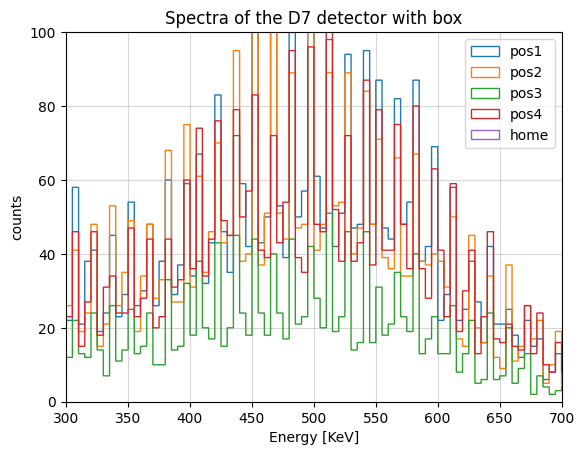

In [548]:
plt.hist(d8_1, bins=int(d8_1.max()/5), histtype='step', label='pos1')
plt.hist(d8_2, bins=int(d8_2.max()/5), histtype='step', label='pos2')
plt.hist(d8_3, bins=int(d8_3.max()/5), histtype='step', label='pos3')
plt.hist(d8_4, bins=int(d8_4.max()/5), histtype='step', label='pos4')
plt.hist(hm_d8_def, bins=int(hm_d8.max()/5), histtype='step', label='home')
plt.xlabel('Energy [KeV]')
plt.ylabel('counts')
plt.title('Spectra of the D7 detector with box')
plt.xlim(300, 700)
plt.ylim(0, 100)
plt.legend()
plt.grid(alpha=0.5)
plt.show()

In [549]:
d2_hm_com  = bbb.normal(hm_d2_def, b=int(hm_d2_def.max()/10), xmin=400, xmax=600, x1=300, x2=700, n=k)
d2_1_fit = bbb.normal(d2_1, b=int(d2_1.max()/10), xmin=400, xmax=600, x1=300, x2=700, n=k)
d2_2_fit = bbb.normal(d2_2, b=int(d2_2.max()/10), xmin=400, xmax=600, x1=300, x2=700, n=k)
d2_3_fit = bbb.normal(d2_3, b=int(d2_3.max()/10), xmin=400, xmax=600, x1=300, x2=700, n=k)
d2_4_fit = bbb.normal(d2_4, b=int(d2_4.max()/10), xmin=400, xmax=600, x1=300, x2=700, n=k)
d2_box = np.array([2*d2_1_fit[5][0]/d2_hm_com[5][0], 2*d2_2_fit[5][0]/d2_hm_com[5][0], 2*d2_3_fit[5][0]/d2_hm_com[5][0], 2*d2_4_fit[5][0]/d2_hm_com[5][0]])

d3_hm_com  = bbb.normal(hm_d3_def, b=int(hm_d3_def.max()/10), xmin=400, xmax=600, x1=300, x2=700, n=k)
d3_1_fit = bbb.normal(d3_1, b=int(d3_1.max()/10), xmin=400, xmax=600, x1=300, x2=700, n=k)
d3_2_fit = bbb.normal(d3_2, b=int(d3_2.max()/10), xmin=400, xmax=600, x1=300, x2=700, n=k)
d3_3_fit = bbb.normal(d3_3, b=int(d3_3.max()/10), xmin=400, xmax=600, x1=300, x2=700, n=k)
d3_4_fit = bbb.normal(d3_4, b=int(d3_4.max()/10), xmin=400, xmax=600, x1=300, x2=700, n=k)
d3_box = np.array([2*d3_1_fit[5][0]/d3_hm_com[5][0], 2*d3_2_fit[5][0]/d3_hm_com[5][0], 2*d3_3_fit[5][0]/d3_hm_com[5][0], 2*d3_4_fit[5][0]/d3_hm_com[5][0]])

d4_hm_com  = bbb.normal(hm_d4_def, b=int(hm_d4_def.max()/10), xmin=400, xmax=600, x1=300, x2=700, n=k)
d4_1_fit = bbb.normal(d4_1, b=int(d4_1.max()/10), xmin=400, xmax=600, x1=300, x2=700, n=k)
d4_2_fit = bbb.normal(d4_2, b=int(d4_2.max()/10), xmin=400, xmax=600, x1=300, x2=700, n=k)
d4_3_fit = bbb.normal(d4_3, b=int(d4_3.max()/10), xmin=400, xmax=600, x1=300, x2=700, n=k)
d4_4_fit = bbb.normal(d4_4, b=int(d4_4.max()/10), xmin=400, xmax=600, x1=300, x2=700, n=k)
d4_box = np.array([2*d4_1_fit[5][0]/d4_hm_com[5][0], 2*d4_2_fit[5][0]/d4_hm_com[5][0], 2*d4_3_fit[5][0]/d4_hm_com[5][0], 2*d4_4_fit[5][0]/d4_hm_com[5][0]])

d5_hm_com  = bbb.normal(hm_d5_def, b=int(hm_d5_def.max()/10), xmin=350, xmax=550, x1=300, x2=700, n=k)
d5_1_fit = bbb.normal(d5_1, b=int(d5_1.max()/10), xmin=350, xmax=550, x1=300, x2=700, n=k)
d5_2_fit = bbb.normal(d5_2, b=int(d5_2.max()/10), xmin=350, xmax=550, x1=300, x2=700, n=k)
d5_3_fit = bbb.normal(d5_3, b=int(d5_3.max()/10), xmin=350, xmax=550, x1=300, x2=700, n=k)
d5_4_fit = bbb.normal(d5_4, b=int(d5_4.max()/10), xmin=350, xmax=550, x1=300, x2=700, n=k)
d5_box = np.array([2*d5_1_fit[5][0]/d5_hm_com[5][0], 2*d5_2_fit[5][0]/d5_hm_com[5][0], 2*d5_3_fit[5][0]/d5_hm_com[5][0], 2*d5_4_fit[5][0]/d5_hm_com[5][0]])

d6_hm_com  = bbb.normal(hm_d6_def, b=int(hm_d6_def.max()/10), xmin=350, xmax=550, x1=400, x2=700, n=k)
d6_1_fit = bbb.normal(d6_1, b=int(d6_1.max()/10), xmin=350, xmax=550, x1=300, x2=700, n=k)
d6_2_fit = bbb.normal(d6_2, b=int(d6_2.max()/10), xmin=350, xmax=550, x1=300, x2=700, n=k)
d6_3_fit = bbb.normal(d6_3, b=int(d6_3.max()/10), xmin=350, xmax=550, x1=300, x2=700, n=k)
d6_4_fit = bbb.normal(d6_4, b=int(d6_4.max()/10), xmin=350, xmax=550, x1=300, x2=700, n=k)
d6_box = np.array([2*d6_1_fit[5][0]/d6_hm_com[5][0], 2*d6_2_fit[5][0]/d6_hm_com[5][0], 2*d6_3_fit[5][0]/d6_hm_com[5][0], 2*d6_4_fit[5][0]/d6_hm_com[5][0]])

d7_hm_com  = bbb.normal(hm_d7_def, b=int(hm_d7_def.max()/10), xmin=400, xmax=650, x1=300, x2=700, n=k)
d7_1_fit = bbb.normal(d7_1, b=int(d7_1.max()/10), xmin=400, xmax=650, x1=300, x2=700, n=k)
d7_2_fit = bbb.normal(d7_2, b=int(d7_2.max()/10), xmin=400, xmax=650, x1=300, x2=700, n=k)
d7_3_fit = bbb.normal(d7_3, b=int(d7_3.max()/10), xmin=400, xmax=650, x1=300, x2=700, n=k)
d7_4_fit = bbb.normal(d7_4, b=int(d7_4.max()/10), xmin=400, xmax=650, x1=300, x2=700, n=k)
d7_box = np.array([2*d7_1_fit[5][0]/d7_hm_com[5][0], 2*d7_2_fit[5][0]/d7_hm_com[5][0], 2*d7_3_fit[5][0]/d7_hm_com[5][0], 2*d7_4_fit[5][0]/d7_hm_com[5][0]])

d8_hm_com  = bbb.normal(hm_d8_def, b=int(hm_d8_def.max()/10), xmin=400, xmax=600, x1=300, x2=700, n=k)
d8_1_fit = bbb.normal(d8_1, b=int(d8_1.max()/10), xmin=400, xmax=600, x1=300, x2=700, n=k)
d8_2_fit = bbb.normal(d8_2, b=int(d8_2.max()/10), xmin=400, xmax=600, x1=300, x2=700, n=k)
d8_3_fit = bbb.normal(d8_3, b=int(d8_3.max()/10), xmin=400, xmax=600, x1=300, x2=700, n=k)
d8_4_fit = bbb.normal(d8_4, b=int(d8_4.max()/10), xmin=400, xmax=600, x1=300, x2=700, n=k)
d8_box = np.array([2*d8_1_fit[5][0]/d8_hm_com[5][0], 2*d8_2_fit[5][0]/d8_hm_com[5][0], 2*d8_3_fit[5][0]/d8_hm_com[5][0], 2*d8_4_fit[5][0]/d8_hm_com[5][0]])


Parametri ottimizzati:
-----------------------------------------------
Ampiezza = 41630.99035785379 ± 1788.9009217306852
Media = 482.8124325119869 ± 3.0666340557442484
Sigma = 84.32704768872586 ± 4.631234016107298
Chi-quadro = 20.65011634940071
Chi-quadro ridotto = 1.214712726435336
Integrale dell'istogramma nel range [314.1583371345352, 651.4665278894386] = 4629 ± 68
Parametri ottimizzati:
-----------------------------------------------
Ampiezza = 15278.362749529768 ± 1187.0985153808613
Media = 464.7584852342823 ± 6.457409027453029
Sigma = 94.33606783037172 ± 8.574096391194564
Chi-quadro = 16.470331738079047
Chi-quadro ridotto = 0.9688430434164145
Integrale dell'istogramma nel range [276.0863495735389, 653.4306208950258] = 1713 ± 41
Parametri ottimizzati:
-----------------------------------------------
Ampiezza = 14862.32251132523 ± 914.8790095722521
Media = 486.86032429528166 ± 4.296455295814701
Sigma = 80.83522520352015 ± 6.451272495829753
Chi-quadro = 18.64224270274135
Chi-quadro r

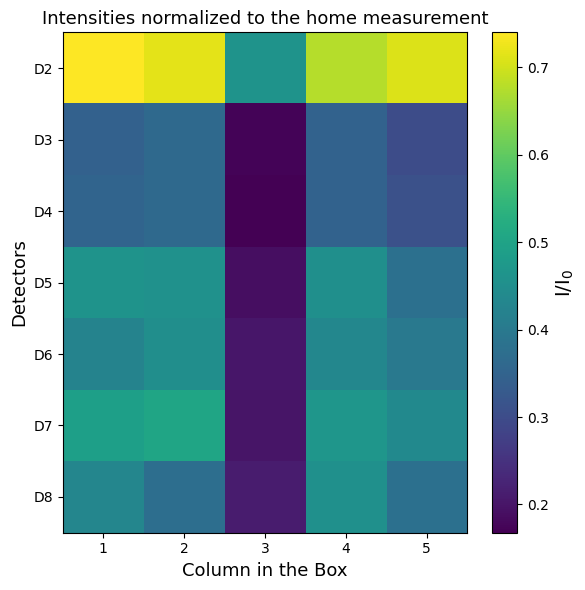

In [550]:
box2 = np.append(d2_box, 0.71)
box3 = np.append(d3_box, 0.3)
box4 = np.append(d4_box, 0.31)
box5 = np.append(d5_box, 0.38)
box6 = np.append(d6_box, 0.4)
box7 = np.append(d7_box, 0.44)
box8 = np.append(d8_box, 0.38)
data = np.array([box2, box3, box4, box5, box6, box7, box8])  # Sostituisci con i tuoi dati reali

# Crea la heatmap
plt.figure(figsize=(6, 6))
plt.imshow(data, cmap='viridis', aspect='auto')

# Aggiungi etichette agli assi
plt.xlabel('Column in the Box', fontsize=13)
plt.ylabel('Detectors', fontsize=13)
plt.title('Intensities normalized to the home measurement', fontsize=13)

# Aggiungi i nomi dei detector (da D2 a D8)
plt.yticks(ticks=np.arange(7), labels=[f'D{i}' for i in range(2, 9)])
plt.xticks(ticks=np.arange(5), labels=[1, 2, 3, 4, 5])


# Aggiungi una barra di colore
cbar = plt.colorbar()
cbar.set_label(r'I/I$_0$', fontsize=14)
cbar.ax.tick_params(labelsize=10)

# Mostra il grafico
plt.tight_layout()
plt.show()
